In [327]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use('fivethirtyeight')

from scipy.stats import zscore

pd.set_option('display.max_columns', None)


In [328]:
#This is for multiple output on Jupyter Notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. Load and Check Data

In [329]:
data = pd.read_csv('https://raw.githubusercontent.com/sdemirus/HousePricePrediction/main/Data/train.csv')
#test = pd.read_csv('https://raw.githubusercontent.com/sdemirus/HousePricePrediction/main/Data/test.csv')

In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 79 feature to predict the house sale price (SalePrice).

In [331]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [332]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [333]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [334]:
data.shape

(1460, 81)

In [335]:
data.drop(columns = 'Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,

In [336]:
data[data.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [337]:
# Numerical Columns
numerical_columns = data.select_dtypes(include = ['number']).columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [338]:
len(numerical_columns)

38

In [339]:
# Categorical Columns
categorical_columns = data.select_dtypes(include = ['object']).columns
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [340]:
len(categorical_columns)

43

In [341]:
# Missing Values
missing_values = data.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [342]:
#data.drop(columns = missing_values[missing_values > len(data) * 0.80].index, inplace = True)

In [343]:
#Numerical Missing Values
num_missing_values = data[numerical_columns].isnull().sum()
num_missing_values[num_missing_values > 0].sort_values(ascending = False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [344]:
#Categorical Missing Values
cat_missing_values = data[categorical_columns].isnull().sum()
cat_missing_values[cat_missing_values > 0 ].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
Electrical         1
dtype: int64

### PoolQC: Pool quality
      
In below step we decided to drop PoolQC column because it was observed that only 7 dwellings have pool and this variable would only be effective for those. PoolArea column can be used to find out which house has pool.  

In [345]:
data.loc[~data['PoolQC'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,NaN,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663,LwQ,377,0,1040,GasA,Fa,Y,SBrkr,1309,0,0,1309,1,0,1,1,3,1,Gd,5,Typ,1,Fa,Attchd,1974.0,RFn,2,484,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,522,Unf,0,574,1096,GasA,TA,Y,SBrkr,1118,0,0,1118,1,0,1,0,3,1,TA,6,Typ,1,Po,Attchd,1977.0,Fin,1,358,TA,TA,Y,203,0,0,0,0,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,NaN,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790,LwQ,469,133,1392,GasA,TA,Y,SBrkr,1392,1392,0,2784,1,0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2,564,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Flat,Tar&Grv,Plywood,Plywood,NaN,0.0,Gd,Gd,CBlock,Gd,TA,Av,Unf,0,Unf,0,697,697,GasA,TA,Y,SBrkr,1575,626,0,2201,0,0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1966.0,Unf,2,432,Gd,Gd,Y,586,236,0,0,0,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [346]:
if 'PoolQC' in data.columns:
    pass
    data.drop(columns = 'PoolQC', inplace = True)
  
data.head()
print('Number of columns: ' + str(len(data.columns)))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


Number of columns: 80


### MiscFeature: Miscellaneous feature not covered in other categories
In below step, MiscFeatures column was checked and observed that only 54 dwellings have those features and it may also be difficult to fill out the null values.

In [347]:
data.loc[~data['MiscFeature'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,Shed,350,11,2009,WD,Normal,200000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,Shed,700,3,2010,WD,Normal,149000
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,Shed,500,10,2006,WD,Normal,90000
51,52,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1934,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,816,816,GasA,TA,Y,SBrkr,816,0,360,1176,0,0,1,0,3,1,TA,6,Typ,1,Gd,Detchd,1985.0,Unf,2,528,TA,TA,Y,112,0,0,0,0,0,MnPrv,Shed,400,9,2006,WD,Normal,114500
84,85,80,RL,NaN,8530,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,1995,1996,Gable,CompShg,HdBoard,HdBoard,BrkFace,22.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,804,670,0,1474,0,0,2,1,3,1,TA,7,Typ,1,TA,BuiltIn,1995.0,Fin,2,400,TA,TA,Y,120,72,0,0,0,0,NaN,Shed,700,5,2009,WD,Normal,168500
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,1993,1993,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Ex,Gd,PConc,Gd,Gd,No,ALQ,310,Unf,0,370,680,GasA,Gd,Y,SBrkr,680,790,0,1470,0,0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,1993.0,Fin,2,420,TA,TA,Y,232,63,0,0,0,0,NaN,Shed,480,4,2009,WD,Normal,185000
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,108,Unf,0,350,458,GasA,Fa,N,SBrkr,835,0,0,835,0,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,1920.0,Unf,1,366,Fa,TA,Y,0,0,77,0,0,0,NaN,Shed,400,5,2010,COD,Abnorml,83000
99,100,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,NaN,Shed,400,1,2010,WD,Normal,128950
106,107,30,RM,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,7,1885,1995,Mansard,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,641,641,GasA,Gd,Y,SBrkr,1047,0,0,1047,0,0,1,0,2,1,TA,6,Ty

In [348]:
if 'MiscFeature' in data.columns:
    pass
    data.drop(columns = 'MiscFeature', inplace = True)
  
data.head()
print('Number of columns: ' + str(len(data.columns)))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


Number of columns: 79


### Alley: Type of alley access to property

In below step, Alley column was checked and observed that only 91 dwellings have those features and it may also be difficult to fill out the null values. 

In [349]:
data.loc[~data['Alley'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Unf,7,7,1930,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,637,637,GasA,Ex,Y,FuseF,1108,0,0,1108,0,0,1,0,3,1,Gd,6,Typ,1,Gd,Attchd,1930.0,Unf,1,280,TA,TA,N,0,0,205,0,0,0,GdPrv,0,6,2007,WD,Normal,139400
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,NaN,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,MnPrv,0,7,2008,WD,Normal,40000
56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,8,5,1999,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,456.0,Gd,TA,PConc,Gd,TA,No,GLQ,649,Unf,0,321,970,GasA,Ex,Y,SBrkr,983,756,0,1739,1,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1999.0,Fin,2,480,TA,TA,Y,115,0,0,0,0,0,NaN,0,8,2009,WD,Abnorml,172500
79,80,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,6,1910,1981,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,440,440,GasA,Gd,Y,SBrkr,682,548,0,1230,0,0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,1966.0,Unf,2,440,TA,TA,Y,74,0,128,0,0,0,MnPrv,0,5,2009,WD,Normal,110000
87,88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,Stone,76.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,612,612,GasA,Ex,Y,SBrkr,612,612,0,1224,0,0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2009.0,RFn,2,528,TA,TA,Y,0,234,0,0,0,0,NaN,0,6,2009,New,Partial,164500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1405,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,3,4,1915,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,672,672,GasA,TA,Y,SBrkr,694,520,0,1214,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1998.0,Unf,3,936,TA,TA,Y,216,0,160,0,0,0,MnPrv,0,1,2006,WD,Family,105000
1414,1415,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,7,1923,2000,Gambrel,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,833,833,GasA,Gd,Y,SBrkr,1053,795,0,1848,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1922.0,Unf,2,370,TA,TA,N,0,0,0,0,220,0,NaN,0,6,2008,WD,Normal,207000
1427,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,5,6,1945,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,580,Unf,0,333,913,GasA,TA,Y,FuseA,1048,510,0,1558,1,0,1,1,3,1,TA,6,Typ,1,TA,Attchd,1962.0,Unf,1,288,TA,TA,Y,0,0,0,0,0,0,NaN,0,4,2008,WD,Normal,140000
1432,1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1927,2007,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,656,656,GasA,TA,Y,SBrkr,968,0,0,968,0,0,2,0,4,1,TA,5,Typ,0,NaN,Detchd,1928.0,Unf,1,216,

In [350]:
if 'Alley' in data.columns:
    pass
    data.drop(columns = 'Alley', inplace = True)
    
data.head()

print('Number of columns: ' + str(len(data.columns)))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


Number of columns: 78


### Fence: Fence quality

In below step that checks the necessity of column 'Fence', it was observed that the 'NA' values mean that the house does not have fence. Therefore this column should stay at least to determine if the dwelling has fence or not and it should be replaced with 'No Fence' instead of NA.

In [351]:
data.loc[~data['Fence'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,MnPrv,700,10,2009,WD,Normal,143000
14,15,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,GdWo,0,5,2008,WD,Normal,157000
15,16,45,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,GdPrv,0,7,2007,WD,Normal,132000
19,20,20,RL,70.0,7560,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1965,Hip,CompShg,BrkFace,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,LwQ,504,Unf,0,525,1029,GasA,TA,Y,SBrkr,1339,0,0,1339,0,0,1,0,3,1,TA,6,Min1,0,NaN,Attchd,1958.0,Unf,1,294,TA,TA,Y,0,0,0,0,0,0,MnPrv,0,5,2009,COD,Abnorml,139000
21,22,45,RM,57.0,7449,Pave,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Unf,7,7,1930,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,637,637,GasA,Ex,Y,FuseF,1108,0,0,1108,0,0,1,0,3,1,Gd,6,Typ,1,Gd,Attchd,1930.0,Unf,1,280,TA,TA,N,0,0,205,0,0,0,GdPrv,0,6,2007,WD,Normal,139400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1437,20,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,PConc,TA,TA,No,ALQ,616,Unf,0,248,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1974.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,GdWo,0,5,2007,WD,Normal,120500
1438,1439,20,RM,90.0,7407,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,6,7,1957,1996,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,GLQ,600,Unf,0,312,912,GasA,TA,Y,FuseA,1236,0,0,1236,1,0,1,0,2,1,TA,6,Typ,0,NaN,Attchd,1957.0,Unf,2,923,TA,TA,Y,0,158,158,0,0,0,MnPrv,0,4,2010,WD,Normal,149700
1448,1449,50,RL,70.0,11767,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,4,7,1910,2000,Gable,CompShg,MetalSd,HdBoard,NaN,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,560,560,GasA,Gd,N,SBrkr,796,550,0,1346,0,0,1,1,2,1,TA,6,Min2,0,NaN,Detchd,1950.0,Unf,1,384,Fa,TA,Y,168,24,0,0,0,0,GdWo,0,5,2007,WD,Normal,112000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,MnPrv,0,2,2010,WD,Normal,210000


In [352]:
data.loc[data['Fence'].isnull(), 'Fence'] = 'No Fence'

In [353]:
data.loc[data['Fence'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [354]:
data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,MnPrv,700,10,2009,WD,Normal,143000
325,326,45,RM,50.0,5000,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,RRAe,Norm,1Fam,1.5Unf,5,6,1941,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,116,Unf,0,604,720,GasA,Po,N,FuseF,803,0,0,803,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1941.0,Unf,2,360,TA,TA,Y,0,0,244,0,0,0,No Fence,0,12,2007,WD,Normal,87000
1033,1034,20,RL,NaN,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,Stone,295.0,Gd,TA,PConc,Gd,TA,No,GLQ,986,Unf,0,668,1654,GasA,Ex,Y,SBrkr,1654,0,0,1654,1,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,Unf,3,900,TA,TA,Y,0,136,0,0,0,0,No Fence,0,2,2006,WD,Normal,230000
625,626,20,RL,87.0,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1962,1962,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,261.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1116,1116,GasA,TA,Y,SBrkr,1116,0,0,1116,0,0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1962.0,Unf,2,440,TA,TA,Y,0,0,0,0,385,0,No Fence,0,2,2010,WD,Normal,160000
1272,1273,20,RL,NaN,13526,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1965,1965,Hip,CompShg,HdBoard,Plywood,BrkFace,114.0,TA,TA,CBlock,TA,TA,No,BLQ,560,LwQ,375,0,935,GasA,TA,Y,SBrkr,935,0,0,935,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1965.0,Unf,1,288,TA,TA,Y,180,0,0,0,0,0,MnPrv,0,11,2006,WD,Normal,137000


In [355]:
# Categorical Columns
categorical_columns = data.select_dtypes(include = ['object']).columns
categorical_columns

#Categorical Missing Values
cat_missing_values = data[categorical_columns].isnull().sum()
cat_missing_values[cat_missing_values > 0 ].sort_values(ascending = False)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

MasVnrType      872
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
Electrical        1
dtype: int64

### MasVnrType: Masonry veneer type

In below step that checks the necessity of column 'MasVnrType', it was observed that the 'NaN' values mean that the house does not have masonry veneer type. Therefore this column should stay at least to determine if the dwelling has fence or not and it should be replaced with 'No Masonry' instead of 'NaN'.

In [356]:
data['MasVnrType']

0       BrkFace
1           NaN
2       BrkFace
3           NaN
4       BrkFace
         ...   
1455        NaN
1456      Stone
1457        NaN
1458        NaN
1459        NaN
Name: MasVnrType, Length: 1460, dtype: object

In [357]:
data.loc[data['MasVnrType'].isnull(), 'MasVnrType'] = 'No Masonry'

In [358]:
data.loc[data['Fence'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [359]:
data.head(10)['MasVnrType']

0       BrkFace
1    No Masonry
2       BrkFace
3    No Masonry
4       BrkFace
5    No Masonry
6         Stone
7         Stone
8    No Masonry
9    No Masonry
Name: MasVnrType, dtype: object

### FireplaceQu: Fireplace quality

In below step that checks the necessity of column 'FireplaceQu', it was observed that the 'NaN' values mean that the house does not have fireplace quality. Therefore this column should stay at least to determine if the dwelling has fence or not and it should be replaced with 'No Fireplace' instead of 'NaN'.

In [360]:
data['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [361]:
data.loc[data['FireplaceQu'].isnull(), 'FireplaceQu'] = 'FireplaceQu'

In [362]:
data.loc[data['FireplaceQu'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [363]:
data.loc[data['GarageArea'] == 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,No Masonry,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,FireplaceQu,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,No Fence,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,No Masonry,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,FireplaceQu,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,No Fence,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,No Masonry,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,FireplaceQu,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,No Fence,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,No Masonry,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,FireplaceQu,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,MnPrv,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,No Masonry,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,FireplaceQu,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,No Fence,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.0,5250,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,No Masonry,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,FireplaceQu,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,No Fence,0,12,2008,WD,Normal,122000
1407,1408,20,RL,NaN,8780,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,No Masonry,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,FireplaceQu,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,MnPrv,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,No Masonry,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,FireplaceQu,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,No Fence,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,No Masonry,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0

In [364]:
data.loc[data['GarageYrBlt'] != data['YearBuilt']]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No Masonry,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Fence,0,2,2006,WD,Abnorml,140000
15,16,45,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,No Masonry,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,FireplaceQu,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,GdPrv,0,7,2007,WD,Normal,132000
26,27,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1951,2000,Gable,CompShg,Wd Sdng,Wd Sdng,No Masonry,0.0,TA,TA,CBlock,TA,TA,Mn,BLQ,234,Rec,486,180,900,GasA,TA,Y,SBrkr,900,0,0,900,0,1,1,0,3,1,Gd,5,Typ,0,FireplaceQu,Detchd,2005.0,Unf,2,576,TA,TA,Y,222,32,0,0,0,0,No Fence,0,5,2010,WD,Normal,134800
27,28,20,RL,98.0,11478,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,No,GLQ,1218,Unf,0,486,1704,GasA,Ex,Y,SBrkr,1704,0,0,1704,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2008.0,RFn,3,772,TA,TA,Y,0,50,0,0,0,0,No Fence,0,5,2010,WD,Normal,306000
29,30,30,RM,60.0,6324,Pave,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,No Masonry,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,520,520,GasA,Fa,N,SBrkr,520,0,0,520,0,0,1,0,1,1,Fa,4,Typ,0,FireplaceQu,Detchd,1920.0,Unf,1,240,Fa,TA,Y,49,0,87,0,0,0,No Fence,0,5,2008,WD,Normal,68500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,1446,85,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,No Masonry,0.0,TA,TA,CBlock,TA,TA,Gd,LwQ,187,Rec,627,0,814,GasA,Gd,Y,SBrkr,913,0,0,913,1,0,1,0,3,1,TA,6,Typ,0,FireplaceQu,Detchd,1990.0,Unf,1,240,TA,TA,Y,0,0,252,0,0,0,No Fence,0,5,2007,WD,Normal,129000
1448,1449,50,RL,70.0,11767,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,4,7,1910,2000,Gable,CompShg,MetalSd,HdBoard,No Masonry,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,560,560,GasA,Gd,N,SBrkr,796,550,0,1346,0,0,1,1,2,1,TA,6,Min2,0,FireplaceQu,Detchd,1950.0,Unf,1,384,Fa,TA,Y,168,24,0,0,0,0,GdWo,0,5,2007,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,No Masonry,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,FireplaceQu,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,No Fence,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,No Masonry,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,T

In [365]:
# Replace missing values in 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' columns with 'No Garage'
data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('No Garage')


In [366]:
data.loc[data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [367]:
#Categorical Missing Values
cat_missing_values = data[data.select_dtypes(include = ['object']).columns].isnull().sum()
cat_missing_values[cat_missing_values > 0 ].sort_values(ascending = False)

BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
Electrical       1
dtype: int64

In [368]:
data[['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']] = data[['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']].fillna('No Basement') 

In [369]:
data.loc[data[['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']].isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [370]:
data.loc[data['BsmtFinType2'] == 'No Basement']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,No Masonry,0.0,TA,TA,Slab,No Basement,No Basement,No Basement,No Basement,0,No Basement,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,FireplaceQu,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,No Fence,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,No Masonry,0.0,TA,TA,PConc,No Basement,No Basement,No Basement,No Basement,0,No Basement,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,FireplaceQu,No Garage,NaN,No Garage,0,0,No Garage,No Garage,N,0,0,0,0,0,0,No Fence,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,No Masonry,0.0,TA,TA,Slab,No Basement,No Basement,No Basement,No Basement,0,No Basement,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,FireplaceQu,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,No Fence,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,No Masonry,0.0,TA,Fa,Slab,No Basement,No Basement,No Basement,No Basement,0,No Basement,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,FireplaceQu,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,No Fence,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,No Masonry,0.0,TA,TA,CBlock,No Basement,No Basement,No Basement,No Basement,0,No Basement,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,FireplaceQu,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,No Fence,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,No Basement,No Basement,No Basement,No Basement,0,No Basement,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,MnPrv,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,No Masonry,0.0,TA,TA,PConc,No Basement,No Basement,No Basement,No Basement,0,No Basement,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,FireplaceQu,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,No Fence,0,12,2008,WD,Normal,97000
332,333,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,No Basement,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,No Fence,0,10,2009,WD,Normal,284000
342,343,90,RL,NaN,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,No Basement,No Basement,No Basement,No Basement,0,No Basement,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,

In [371]:
data.loc[data['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,No Masonry,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,FireplaceQu,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,No Fence,0,5,2008,WD,Normal,167500


In [372]:
data.loc[data['Electrical'].isnull(), 'Electrical'] = data['Electrical'].mode()[0]

In [373]:
data.loc[data['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [374]:
data.iloc[[1379]]['Electrical']

1379    SBrkr
Name: Electrical, dtype: object

In [375]:
#Categorical Missing Values
#cat_missing_values = data[data.select_dtypes(include = ['object']).columns].isnull().sum()
data[data.select_dtypes(include = ['object']).columns].isnull().sum()[data[data.select_dtypes(include = ['object']).columns].isnull().sum() > 0 ].sort_values(ascending = False)

Series([], dtype: int64)

In [376]:
# Numerical Columns
numerical_columns = data.select_dtypes(include = ['number']).columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [377]:
#Numerical Missing Values
num_missing_values = data[numerical_columns].isnull().sum()
num_missing_values[num_missing_values > 0].sort_values(ascending = False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

### LotFrontage: Linear feet of street connected to property

In [378]:
data.loc[~data['LotFrontage'].isnull()].sort_values(by='LotFrontage')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
232,233,160,RM,21.0,1680,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1972,1972,Gable,CompShg,HdBoard,HdBoard,BrkFace,297.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,483,483,GasA,TA,Y,SBrkr,483,504,0,987,0,0,1,1,2,1,TA,5,Typ,1,Po,Attchd,1972.0,Unf,1,288,TA,TA,Y,0,0,0,0,0,0,No Fence,0,6,2006,WD,Normal,94500
837,838,160,RM,21.0,1680,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1973,1973,Gable,CompShg,HdBoard,HdBoard,BrkFace,158.0,TA,TA,CBlock,TA,TA,No,BLQ,330,Unf,0,153,483,GasA,TA,Y,SBrkr,483,504,0,987,1,0,1,1,2,1,TA,5,Typ,0,FireplaceQu,Detchd,1973.0,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,No Fence,0,11,2008,WD,Normal,100000
235,236,160,RM,21.0,1680,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,6,3,1971,1971,Gable,CompShg,HdBoard,HdBoard,BrkFace,604.0,TA,TA,CBlock,TA,TA,No,ALQ,358,Unf,0,125,483,GasA,TA,Y,SBrkr,483,504,0,987,0,0,1,1,2,1,TA,5,Typ,0,FireplaceQu,Detchd,1971.0,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,No Fence,0,8,2008,WD,Normal,89500
1029,1030,160,RM,21.0,1680,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,7,1972,1972,Gable,CompShg,HdBoard,HdBoard,BrkFace,281.0,TA,TA,CBlock,TA,TA,No,BLQ,317,Unf,0,355,672,GasA,Gd,Y,SBrkr,672,546,0,1218,0,1,1,1,3,1,TA,7,Typ,0,FireplaceQu,Detchd,1972.0,Unf,1,264,TA,TA,Y,0,28,0,0,0,0,No Fence,0,5,2006,WD,Normal,118000
1038,1039,160,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,2008,Gable,CompShg,CemntBd,CmentBd,No Masonry,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,546,546,GasA,TA,Y,SBrkr,798,546,0,1344,0,0,1,1,3,1,TA,6,Typ,1,TA,No Garage,NaN,No Garage,0,0,No Garage,No Garage,Y,0,0,0,0,0,0,No Fence,0,5,2009,WD,Normal,97000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,232,60,RL,174.0,15138,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1995,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,506.0,Gd,TA,PConc,Gd,TA,No,GLQ,689,Unf,0,773,1462,GasA,Ex,Y,SBrkr,1490,1304,0,2794,1,0,2,1,4,1,Ex,9,Typ,1,TA,Attchd,1995.0,Fin,3,810,TA,TA,Y,0,146,202,0,0,0,No Fence,0,7,2009,WD,Normal,403000
197,198,75,RL,174.0,25419,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,No Masonry,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,GdPrv,0,3,2006,WD,Abnorml,235000
1127,1128,20,RL,182.0,14572,Pave,IR3,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,2004,2004,Hip,CompShg,VinylSd,VinylSd,No Masonry,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1300,Unf,0,230,1530,GasA,Ex,Y,SBrkr,1530,0,0,1530,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,Fin,3,630,TA,TA,Y,144,36,0,0,0,0,No Fence,0,11,2007,WD,Family,259000
934,935,20,RL,313.0,27650,Pave,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,No Masonry,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex

In [379]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [380]:
data['LotFrontage'].fillna(round(data['LotFrontage'].mean()), inplace=True)

#data.loc[data['Electrical'].isnull(), 'LotFrontage'] = data['LotFrontage'].mean()[0]

In [381]:
data['LotFrontage'].describe()

count    1460.000000
mean       70.041096
std        22.024031
min        21.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

### GarageYrBlt: Year garage was built

In [382]:
data[['GarageYrBlt']].sort_values(by = 'GarageYrBlt' )

,GarageYrBlt
93,1900.0
653,1906.0
848,1908.0
740,1910.0
246,1910.0
...,...
1349,NaN
1407,NaN
1449,NaN
1450,NaN


In [383]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

In [384]:
data['GarageYrBlt'].isnull().sum()

0

### MasVnrArea: Masonry veneer area in square feet

In [385]:
data[['MasVnrArea', 'MasVnrType']].sort_values(by = 'MasVnrArea' )

,MasVnrArea,MasVnrType
1459,0.0,No Masonry
620,0.0,No Masonry
621,0.0,No Masonry
1140,0.0,No Masonry
1139,0.0,No Masonry
...,...,...
936,NaN,No Masonry
973,NaN,No Masonry
977,NaN,No Masonry
1243,NaN,No Masonry


In [386]:
data[data['MasVnrArea'].isnull()][['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,No Masonry
529,NaN,No Masonry
650,NaN,No Masonry
936,NaN,No Masonry
973,NaN,No Masonry
977,NaN,No Masonry
1243,NaN,No Masonry
1278,NaN,No Masonry


In [387]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [388]:
data['MasVnrArea'].isnull().sum()

0

In [389]:
data.columns[data.isnull().any()]

Index([], dtype='object')

<Axes: xlabel='Id'>

Text(0.5, 1.0, 'Id')

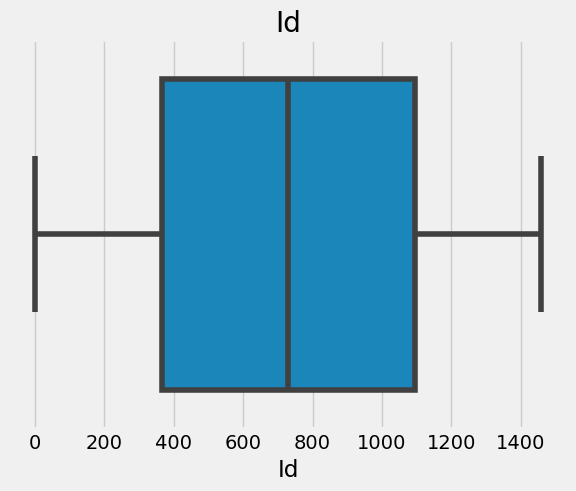

<Axes: xlabel='MSSubClass'>

Text(0.5, 1.0, 'MSSubClass')

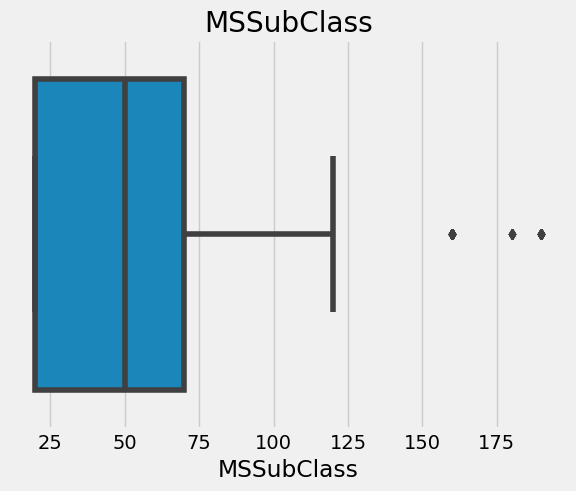

<Axes: xlabel='LotFrontage'>

Text(0.5, 1.0, 'LotFrontage')

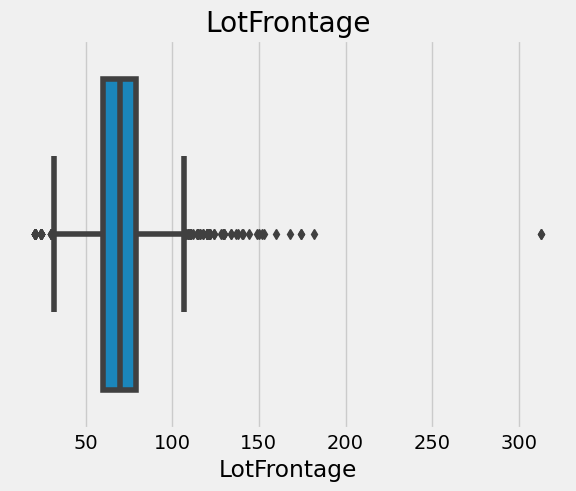

<Axes: xlabel='LotArea'>

Text(0.5, 1.0, 'LotArea')

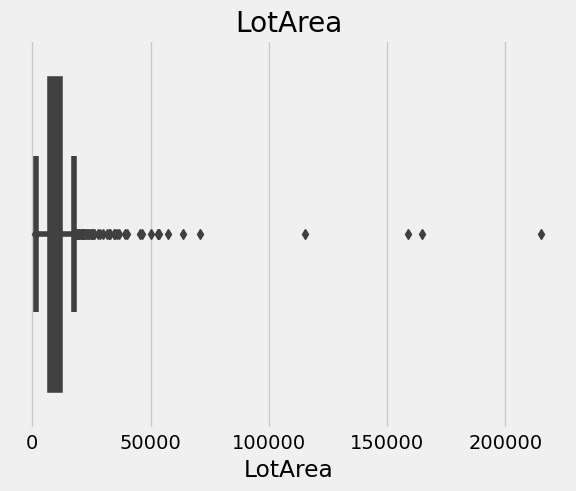

<Axes: xlabel='OverallQual'>

Text(0.5, 1.0, 'OverallQual')

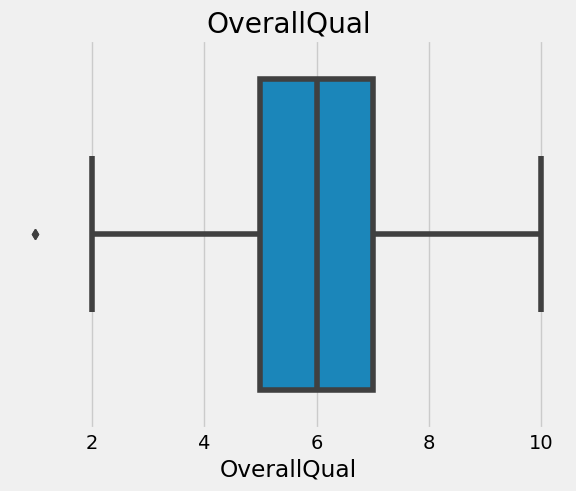

<Axes: xlabel='OverallCond'>

Text(0.5, 1.0, 'OverallCond')

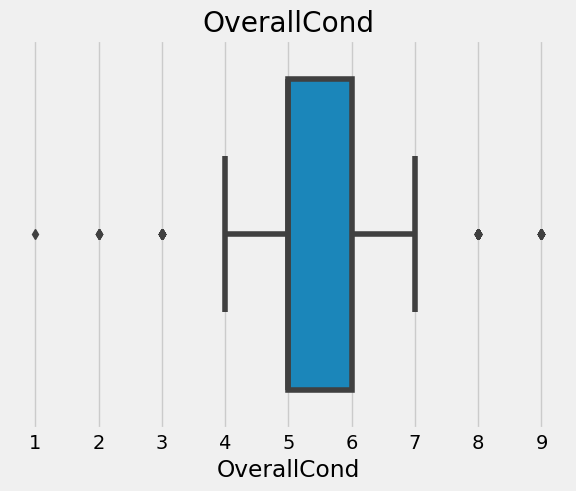

<Axes: xlabel='YearBuilt'>

Text(0.5, 1.0, 'YearBuilt')

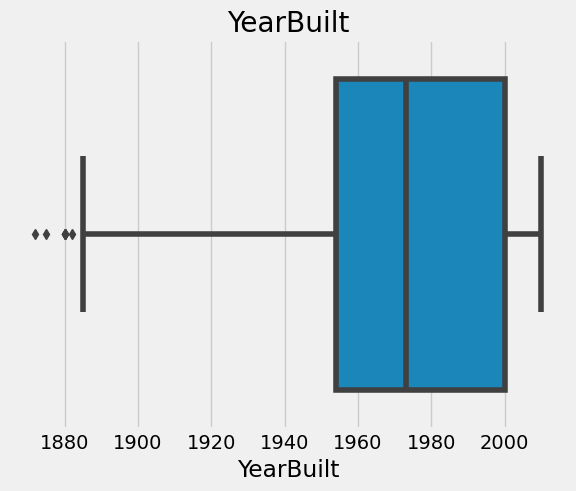

<Axes: xlabel='YearRemodAdd'>

Text(0.5, 1.0, 'YearRemodAdd')

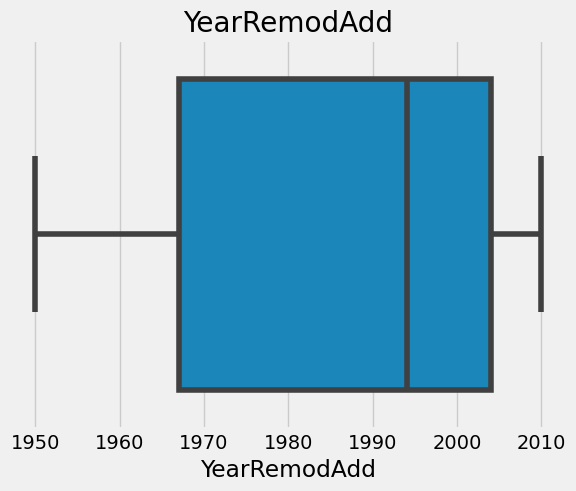

<Axes: xlabel='MasVnrArea'>

Text(0.5, 1.0, 'MasVnrArea')

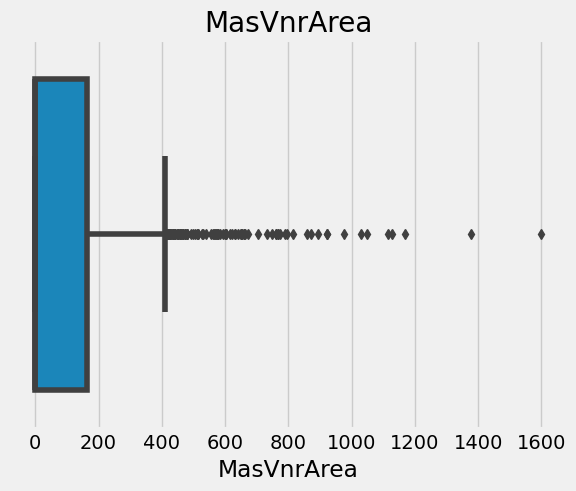

<Axes: xlabel='BsmtFinSF1'>

Text(0.5, 1.0, 'BsmtFinSF1')

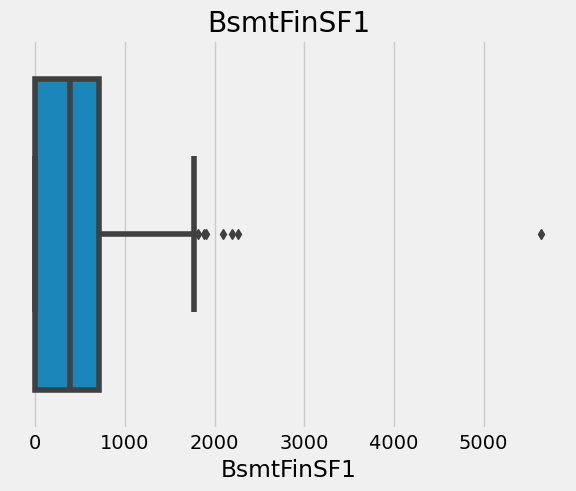

<Axes: xlabel='BsmtFinSF2'>

Text(0.5, 1.0, 'BsmtFinSF2')

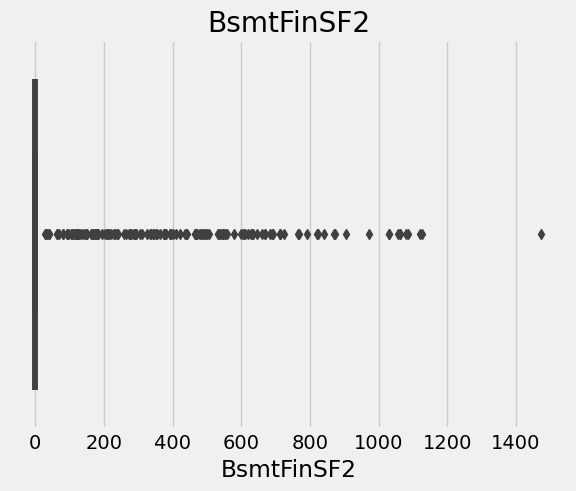

<Axes: xlabel='BsmtUnfSF'>

Text(0.5, 1.0, 'BsmtUnfSF')

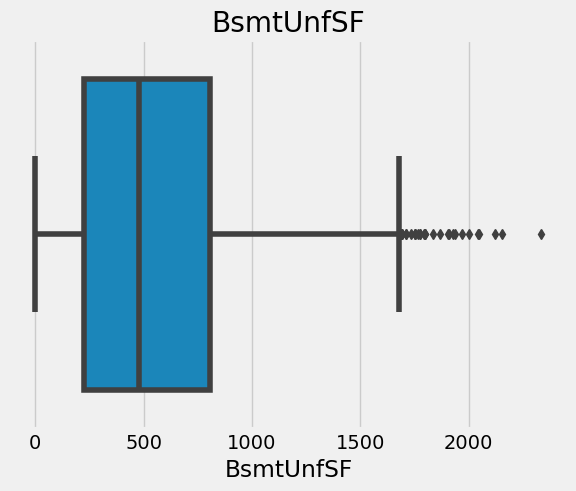

<Axes: xlabel='TotalBsmtSF'>

Text(0.5, 1.0, 'TotalBsmtSF')

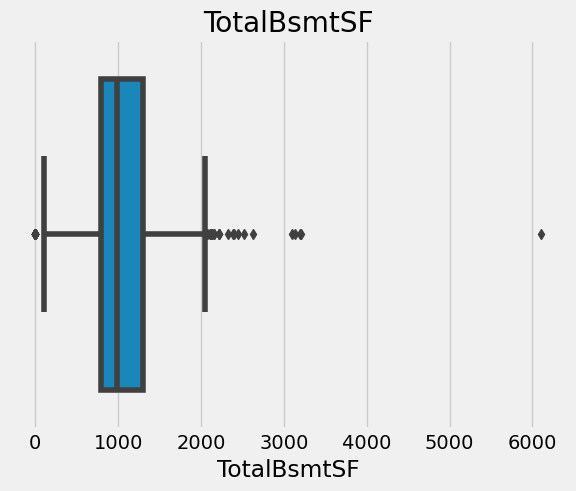

<Axes: xlabel='1stFlrSF'>

Text(0.5, 1.0, '1stFlrSF')

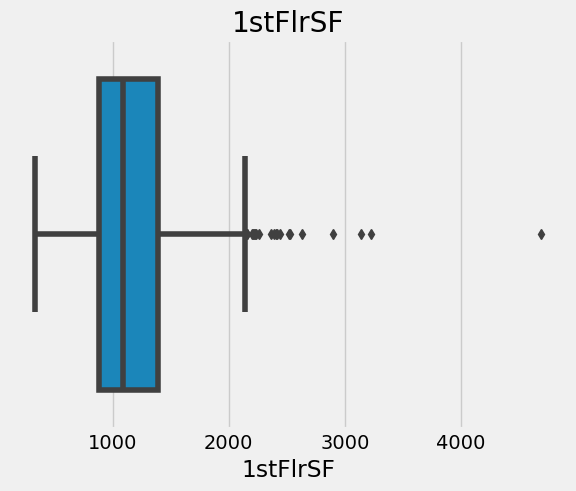

<Axes: xlabel='2ndFlrSF'>

Text(0.5, 1.0, '2ndFlrSF')

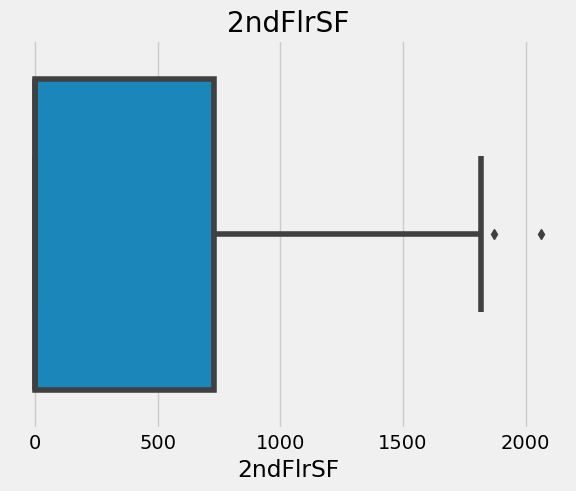

<Axes: xlabel='LowQualFinSF'>

Text(0.5, 1.0, 'LowQualFinSF')

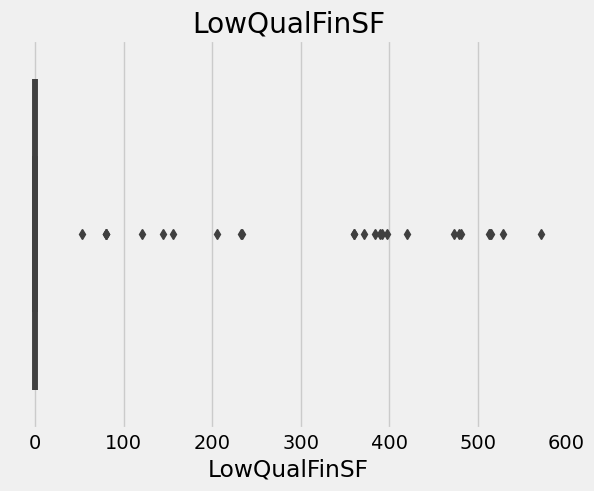

<Axes: xlabel='GrLivArea'>

Text(0.5, 1.0, 'GrLivArea')

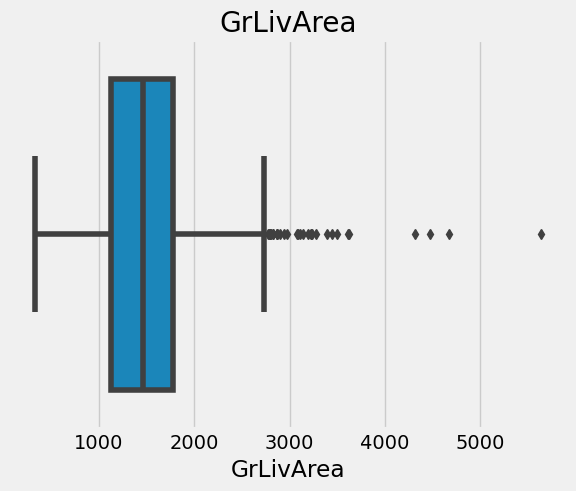

<Axes: xlabel='BsmtFullBath'>

Text(0.5, 1.0, 'BsmtFullBath')

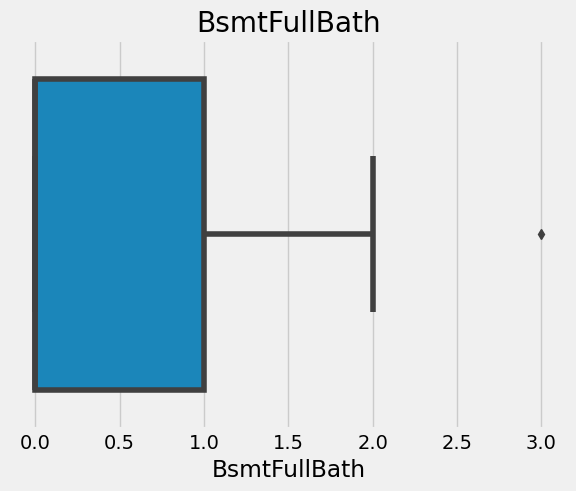

<Axes: xlabel='BsmtHalfBath'>

Text(0.5, 1.0, 'BsmtHalfBath')

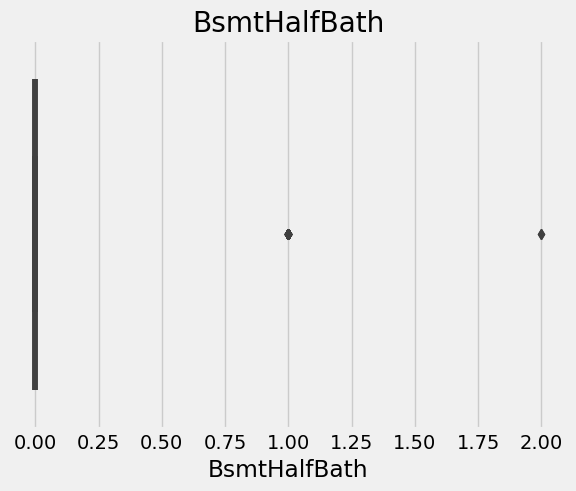

<Axes: xlabel='FullBath'>

Text(0.5, 1.0, 'FullBath')

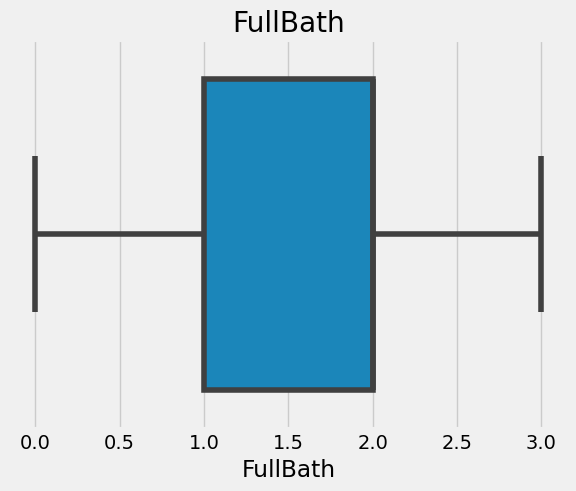

<Axes: xlabel='HalfBath'>

Text(0.5, 1.0, 'HalfBath')

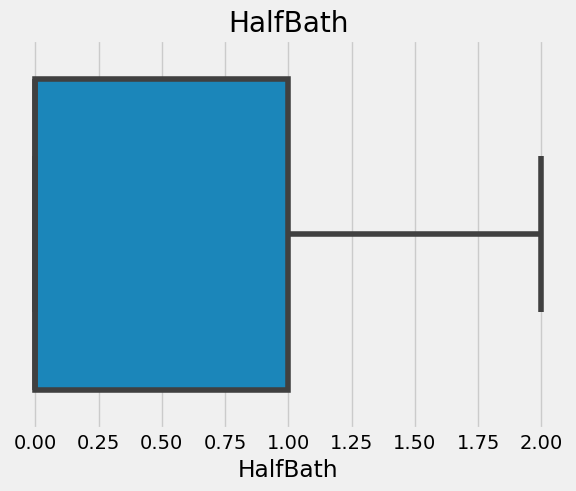

<Axes: xlabel='BedroomAbvGr'>

Text(0.5, 1.0, 'BedroomAbvGr')

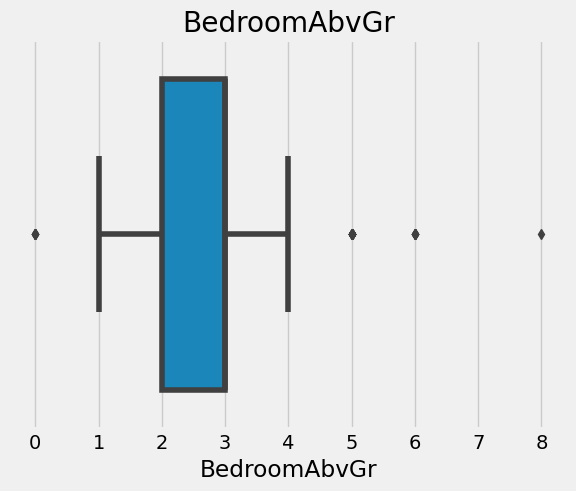

<Axes: xlabel='KitchenAbvGr'>

Text(0.5, 1.0, 'KitchenAbvGr')

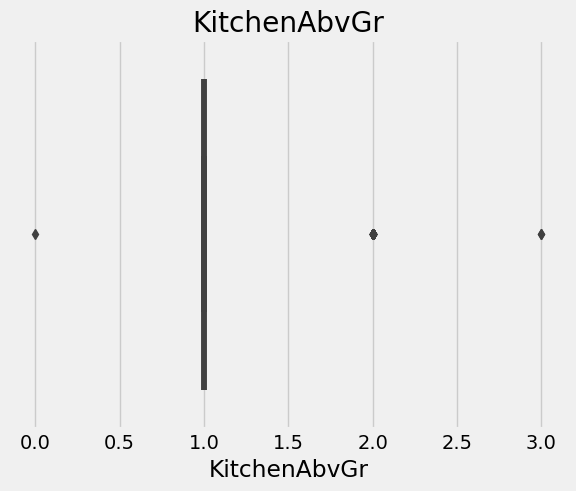

<Axes: xlabel='TotRmsAbvGrd'>

Text(0.5, 1.0, 'TotRmsAbvGrd')

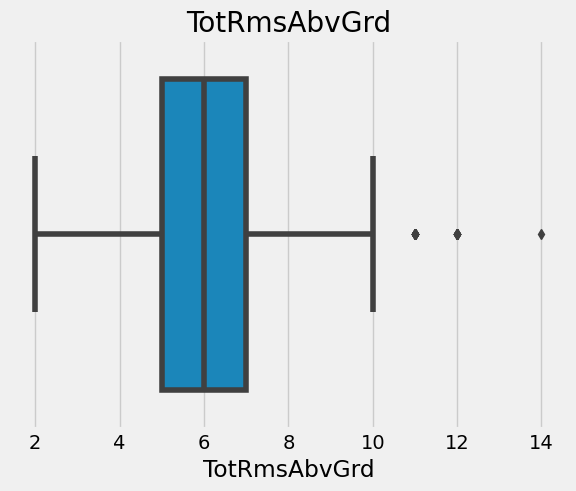

<Axes: xlabel='Fireplaces'>

Text(0.5, 1.0, 'Fireplaces')

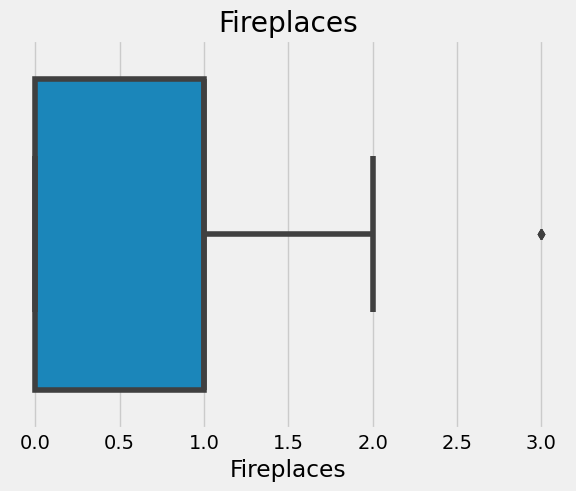

<Axes: xlabel='GarageYrBlt'>

Text(0.5, 1.0, 'GarageYrBlt')

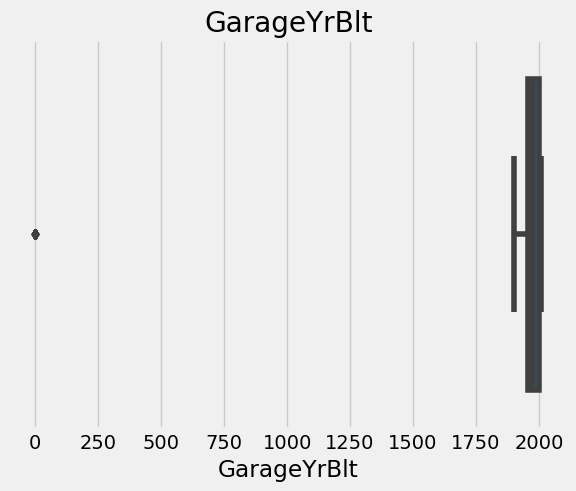

<Axes: xlabel='GarageCars'>

Text(0.5, 1.0, 'GarageCars')

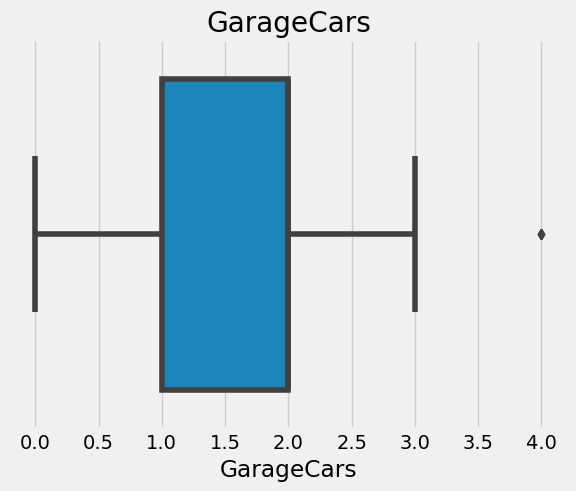

<Axes: xlabel='GarageArea'>

Text(0.5, 1.0, 'GarageArea')

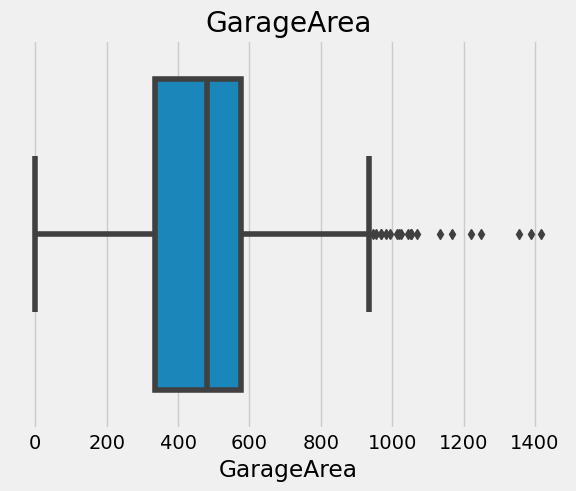

<Axes: xlabel='WoodDeckSF'>

Text(0.5, 1.0, 'WoodDeckSF')

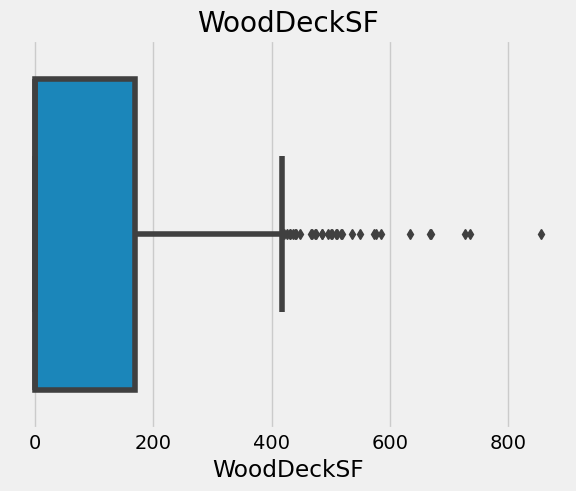

<Axes: xlabel='OpenPorchSF'>

Text(0.5, 1.0, 'OpenPorchSF')

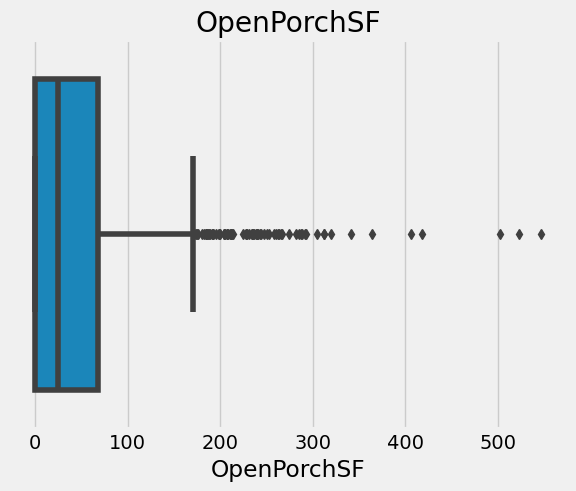

<Axes: xlabel='EnclosedPorch'>

Text(0.5, 1.0, 'EnclosedPorch')

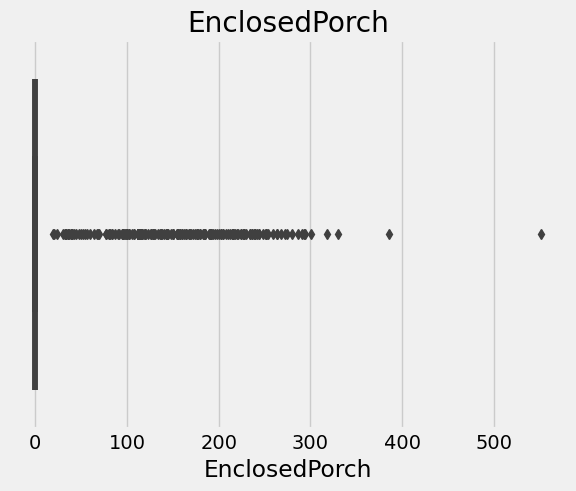

<Axes: xlabel='3SsnPorch'>

Text(0.5, 1.0, '3SsnPorch')

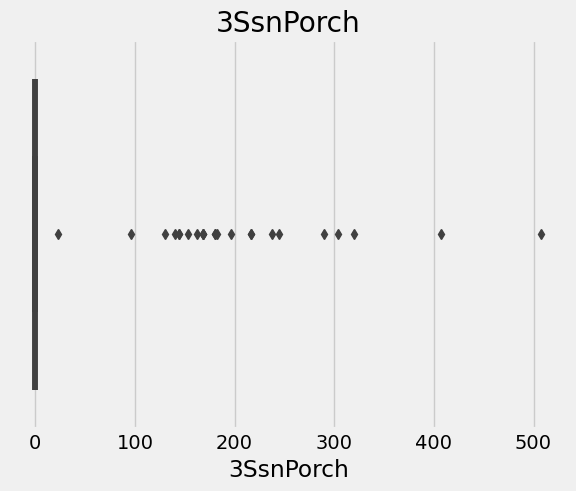

<Axes: xlabel='ScreenPorch'>

Text(0.5, 1.0, 'ScreenPorch')

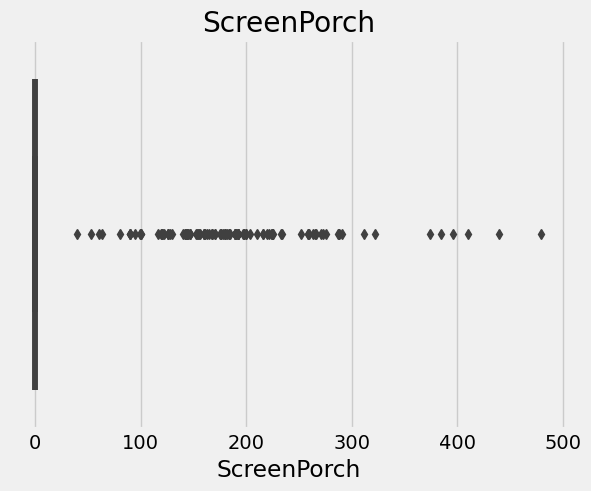

<Axes: xlabel='PoolArea'>

Text(0.5, 1.0, 'PoolArea')

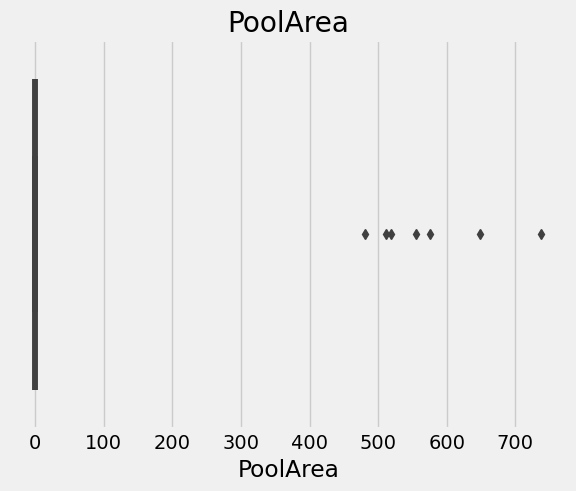

<Axes: xlabel='MiscVal'>

Text(0.5, 1.0, 'MiscVal')

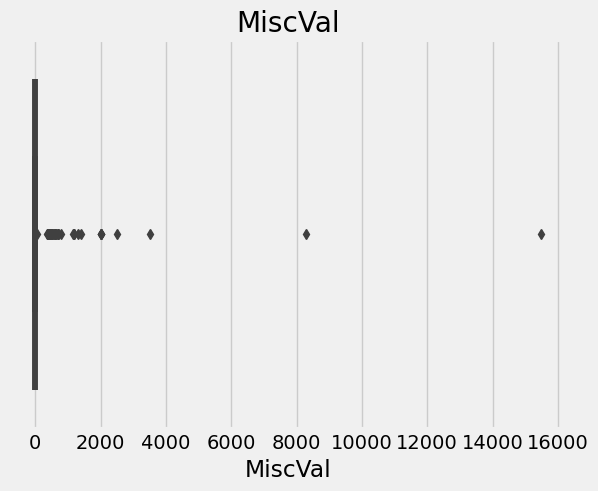

<Axes: xlabel='MoSold'>

Text(0.5, 1.0, 'MoSold')

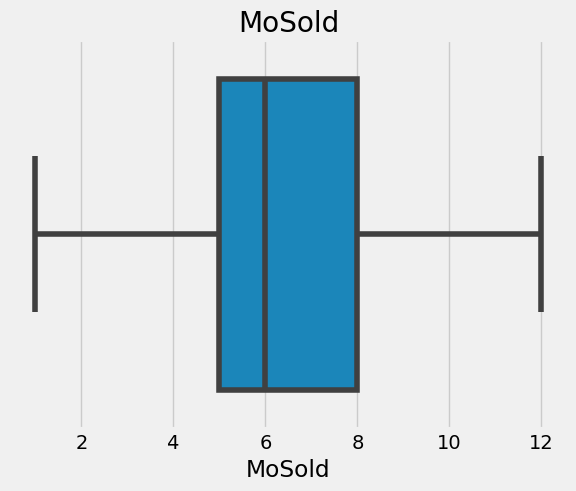

<Axes: xlabel='YrSold'>

Text(0.5, 1.0, 'YrSold')

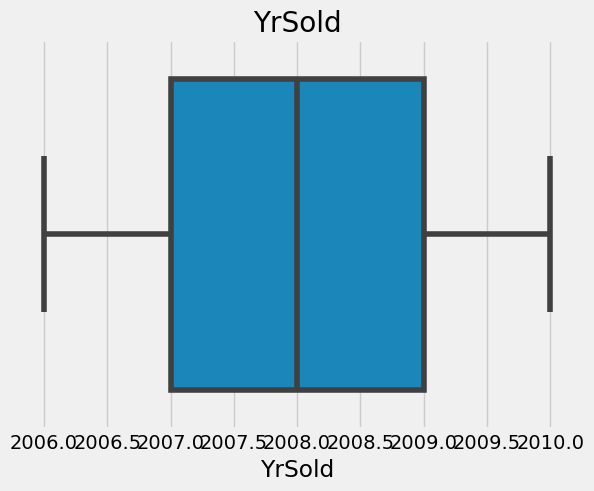

<Axes: xlabel='SalePrice'>

Text(0.5, 1.0, 'SalePrice')

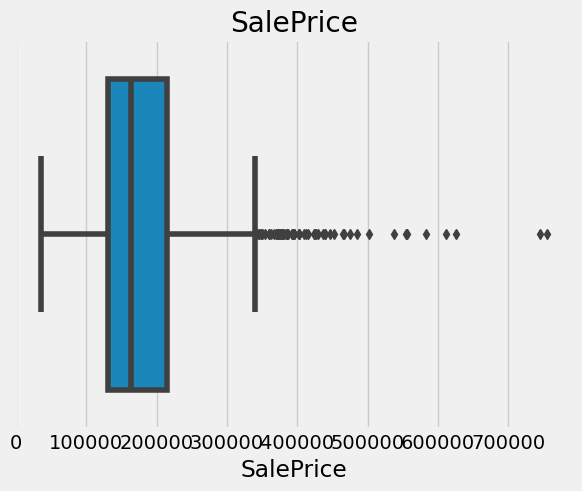

In [390]:
for column in numerical_columns:
    sns.boxplot(x=data[column])
    plt.title(column)
    plt.show()

In [391]:
data_f = data[numerical_columns]

In [392]:
data_f = data_f.drop(columns = 'LotArea')

In [393]:
data_f

,Id,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38]),
 [Text(1, 0, 'Id'),
  Text(2, 0, 'MSSubClass'),
  Text(3, 0, 'LotFrontage'),
  Text(4, 0, 'LotArea'),
  Text(5, 0, 'OverallQual'),
  Text(6, 0, 'OverallCond'),
  Text(7, 0, 'YearBuilt'),
  Text(8, 0, 'YearRemodAdd'),
  Text(9, 0, 'MasVnrArea'),
  Text(10, 0, 'BsmtFinSF1'),
  Text(11, 0, 'BsmtFinSF2'),
  Text(12, 0, 'BsmtUnfSF'),
  Text(13, 0, 'TotalBsmtSF'),
  Text(14, 0, '1stFlrSF'),
  Text(15, 0, '2ndFlrSF'),
  Text(16, 0, 'LowQualFinSF'),
  Text(17, 0, 'GrLivArea'),
  Text(18, 0, 'BsmtFullBath'),
  Text(19, 0, 'BsmtHalfBath'),
  Text(20, 0, 'FullBath'),
  Text(21, 0, 'HalfBath'),
  Text(22, 0, 'BedroomAbvGr'),
  Text(23, 0, 'KitchenAbvGr'),
  Text(24, 0, 'TotRmsAbvGrd'),
  Text(25, 0, 'Fireplaces'),
  Text(26, 0, 'GarageYrBlt'),
  Text(27, 0, 'GarageCars'),
  Text(28, 0, 'GarageArea'),
  Text(29, 0, 'WoodDec

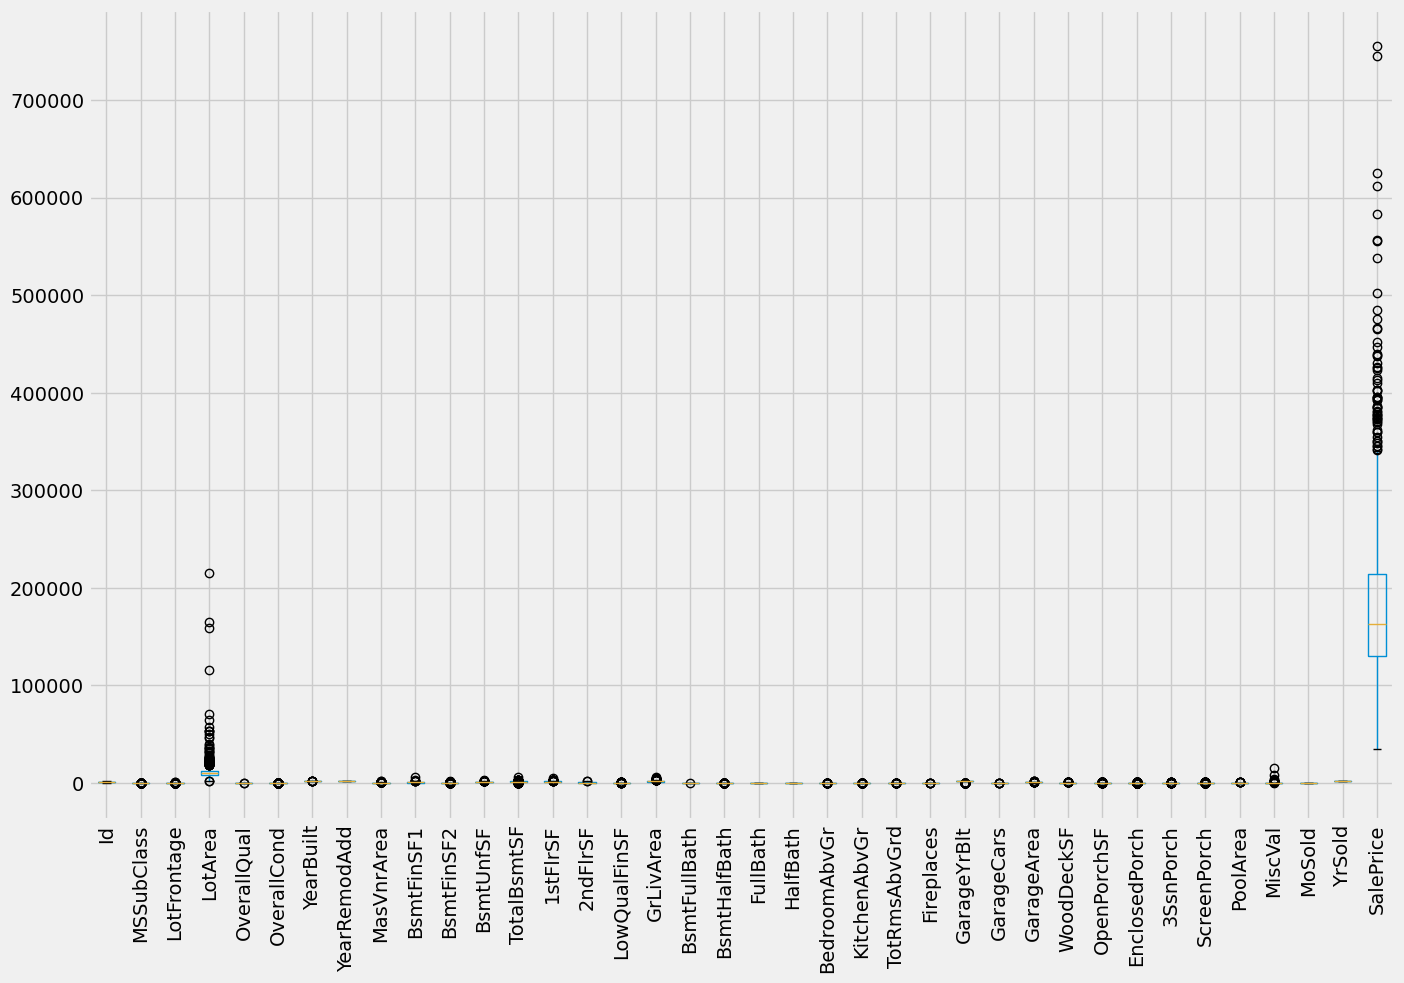

In [394]:
plt.figure(figsize=(15, 10))
data.boxplot()
plt.xticks(rotation=90)  # Sütun etiketlerini 90 derece döndürmek
plt.show()


In [395]:
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
data1 = data[numerical_columns][~((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
data1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000
10,11,20,70.0,11200,5,5,1965,1965,0.0,906,0,134,1040,1040,0,0,1040,1,0,1,0,3,1,5,0,1965.0,1,384,0,0,0,0,0,0,0,2,2008,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,1445,20,63.0,8500,7,5,2004,2004,106.0,0,0,1422,1422,1422,0,0,1422,0,0,2,0,3,1,7,0,2004.0,2,626,192,60,0,0,0,0,0,11,2007,179600
1448,1449,50,70.0,11767,4,7,1910,2000,0.0,0,0,560,560,796,550,0,1346,0,0,1,1,2,1,6,0,1950.0,1,384,168,24,0,0,0,0,0,5,2007,112000
1451,1452,20,78.0,9262,8,5,2008,2009,194.0,0,0,1573,1573,1578,0,0,1578,0,0,2,0,3,1,7,1,2008.0,3,840,0,36,0,0,0,0,0,5,2009,287090
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410,0,811,1221,1221,0,0,1221,1,0,2,0,2,1,6,0,2004.0,2,400,0,113,0,0,0,0,0,10,2009,185000


<Figure size 1000x800 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x24043bb5e90>,
 'caps': [<matplotlib.lines.Line2D at 0x24043bb7110>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043b52890>],
 'medians': [<matplotlib.lines.Line2D at 0x24043bc41d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043bc4910>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043bc5510>,
 'caps': [<matplotlib.lines.Line2D at 0x24043bc66d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043bb5750>],
 'medians': [<matplotlib.lines.Line2D at 0x24043bc7590>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043bc7e50>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043bd4f10>,
 'caps': [<matplotlib.lines.Line2D at 0x24043bd6190>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043ba1890>],
 'medians': [<matplotlib.lines.Line2D at 0x24043bd7110>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043bd78d0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043be0d50>,
 'caps': [<matplotlib.lines.Line2D at 0x24043be2050>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043be0650>],
 'medians': [<matplotlib.lines.Line2D at 0x24043be30d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043be38d0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043bf17d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24043bf2890>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043bf1150>],
 'medians': [<matplotlib.lines.Line2D at 0x24043bf3810>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043bfc090>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043bfe090>,
 'caps': [<matplotlib.lines.Line2D at 0x24043bff250>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043bfc690>],
 'medians': [<matplotlib.lines.Line2D at 0x24043c04250>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043c049d0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043c06890>,
 'caps': [<matplotlib.lines.Line2D at 0x24043c07b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043c062d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24043c10cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043c11410>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043c13190>,
 'caps': [<matplotlib.lines.Line2D at 0x24043c1c210>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043c12510>],
 'medians': [<matplotlib.lines.Line2D at 0x24043c1d150>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043c1d850>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043c1f650>,
 'caps': [<matplotlib.lines.Line2D at 0x24043c308d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043c1ed50>],
 'medians': [<matplotlib.lines.Line2D at 0x24043c31810>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043c32110>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043c33fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x24043c39510>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043c33910>],
 'medians': [<matplotlib.lines.Line2D at 0x24043bfc650>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043c3aa90>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043c28a50>,
 'caps': [<matplotlib.lines.Line2D at 0x24043c29b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043c283d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24043c28a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043c2b310>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043c59110>,
 'caps': [<matplotlib.lines.Line2D at 0x24043c5a350>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043c58a50>],
 'medians': [<matplotlib.lines.Line2D at 0x24043b93710>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043c5b990>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043c69950>,
 'caps': [<matplotlib.lines.Line2D at 0x24043c6aa50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043c69310>],
 'medians': [<matplotlib.lines.Line2D at 0x24043c6b950>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043c70150>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043c72090>,
 'caps': [<matplotlib.lines.Line2D at 0x24043c731d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043c69210>],
 'medians': [<matplotlib.lines.Line2D at 0x24043c6c210>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043c6c9d0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043c6e950>,
 'caps': [<matplotlib.lines.Line2D at 0x24043c6fa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043c3bf50>],
 'medians': [<matplotlib.lines.Line2D at 0x24043c88a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043c89250>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043c8b290>,
 'caps': [<matplotlib.lines.Line2D at 0x24043c94590>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043c8aad0>],
 'medians': [<matplotlib.lines.Line2D at 0x24043c95410>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043c95cd0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043c979d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24043ca0a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043c97410>],
 'medians': [<matplotlib.lines.Line2D at 0x24043ca1950>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043ca2190>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043cac150>,
 'caps': [<matplotlib.lines.Line2D at 0x24043cad210>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043ca3a50>],
 'medians': [<matplotlib.lines.Line2D at 0x24043cae150>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043cae990>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043cb0a90>,
 'caps': [<matplotlib.lines.Line2D at 0x24043cb1d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043cb0290>],
 'medians': [<matplotlib.lines.Line2D at 0x24043c73f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043cb3190>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043cc9090>,
 'caps': [<matplotlib.lines.Line2D at 0x24043cca310>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043ca32d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24043ccb1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043ccba10>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043cd5b50>,
 'caps': [<matplotlib.lines.Line2D at 0x24043cd6d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043cad850>],
 'medians': [<matplotlib.lines.Line2D at 0x24043cd7b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043ce4390>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043ce6190>,
 'caps': [<matplotlib.lines.Line2D at 0x24043ce7350>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043ce57d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24043cf4410>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043cf4c50>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043cf6a50>,
 'caps': [<matplotlib.lines.Line2D at 0x24043cf7b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043cac5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24043cf8bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043cf9350>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043cfb1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24043d00410>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043cf60d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24043d01310>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043d01ad0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043d03b90>,
 'caps': [<matplotlib.lines.Line2D at 0x24043d14e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043d03410>],
 'medians': [<matplotlib.lines.Line2D at 0x24043d16010>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043d16790>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043d20410>,
 'caps': [<matplotlib.lines.Line2D at 0x24043d213d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043d15650>],
 'medians': [<matplotlib.lines.Line2D at 0x24043d22350>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043d22b10>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043d249d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24043d25c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043d020d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24043cfa710>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043d27310>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043d39250>,
 'caps': [<matplotlib.lines.Line2D at 0x24043d3a390>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043d38c10>],
 'medians': [<matplotlib.lines.Line2D at 0x24043d3b290>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043d3ba10>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043d498d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24043d4abd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043d49290>],
 'medians': [<matplotlib.lines.Line2D at 0x24043d4bc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043d54490>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043d56290>,
 'caps': [<matplotlib.lines.Line2D at 0x24043d57250>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043d55610>],
 'medians': [<matplotlib.lines.Line2D at 0x24043d64150>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043d64950>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043d667d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24043d67950>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043d66210>],
 'medians': [<matplotlib.lines.Line2D at 0x24043d6c810>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043d6d090>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043d6ef10>,
 'caps': [<matplotlib.lines.Line2D at 0x24043d780d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043d6e610>],
 'medians': [<matplotlib.lines.Line2D at 0x24043d78d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043d79710>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043d7b810>,
 'caps': [<matplotlib.lines.Line2D at 0x24043d88a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043d7b090>],
 'medians': [<matplotlib.lines.Line2D at 0x24043d89a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043d8a1d0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043d8c090>,
 'caps': [<matplotlib.lines.Line2D at 0x24043d8d1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043d8b1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24043d8e110>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043d8e850>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043d98850>,
 'caps': [<matplotlib.lines.Line2D at 0x24043d99890>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043d980d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24043d9a810>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043d9b0d0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043dacd50>,
 'caps': [<matplotlib.lines.Line2D at 0x24043dae110>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043dac810>],
 'medians': [<matplotlib.lines.Line2D at 0x24043daefd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043daf750>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043db9510>,
 'caps': [<matplotlib.lines.Line2D at 0x24043dba6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043db8b90>],
 'medians': [<matplotlib.lines.Line2D at 0x24043dbb690>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043dbbe50>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x24043dc9f50>,
 'caps': [<matplotlib.lines.Line2D at 0x24043dcb190>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043dc97d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24043dd8290>],
 'fliers': [<matplotlib.lines.Line2D at 0x24043dd8a10>],
 'means': []}

([<matplotlib.axis.XTick at 0x24043b086d0>,
 [Text(0, 0, 'Id'),
  Text(1, 0, 'MSSubClass'),
  Text(2, 0, 'MSZoning'),
  Text(3, 0, 'LotFrontage'),
  Text(4, 0, 'LotArea'),
  Text(5, 0, 'Street'),
  Text(6, 0, 'LotShape'),
  Text(7, 0, 'LandContour'),
  Text(8, 0, 'Utilities'),
  Text(9, 0, 'LotConfig'),
  Text(10, 0, 'LandSlope'),
  Text(11, 0, 'Neighborhood'),
  Text(12, 0, 'Condition1'),
  Text(13, 0, 'Condition2'),
  Text(14, 0, 'BldgType'),
  Text(15, 0, 'HouseStyle'),
  Text(16, 0, 'OverallQual'),
  Text(17, 0, 'OverallCond'),
  Text(18, 0, 'YearBuilt'),
  Text(19, 0, 'YearRemodAdd'),
  Text(20, 0, 'RoofStyle'),
  Text(21, 0, 'RoofMatl'),
  Text(22, 0, 'Exterior1st'),
  Text(23, 0, 'Exterior2nd'),
  Text(24, 0, 'MasVnrType'),
  Text(25, 0, 'MasVnrArea'),
  Text(26, 0, 'ExterQual'),
  Text(27, 0, 'ExterCond'),
  Text(28, 0, 'Foundation'),
  Text(29, 0, 'BsmtQual'),
  Text(30, 0, 'BsmtCond'),
  Text(31, 0, 'BsmtExposure'),
  Text(32, 0, 'BsmtFinType1'),
  Text(33, 0, 'BsmtFinSF1'),


Text(0.5, 1.0, 'Tüm Sütunlar için Kutu Grafiği')

Text(0.5, 0, 'Sütunlar')

Text(0, 0.5, 'Değerler')

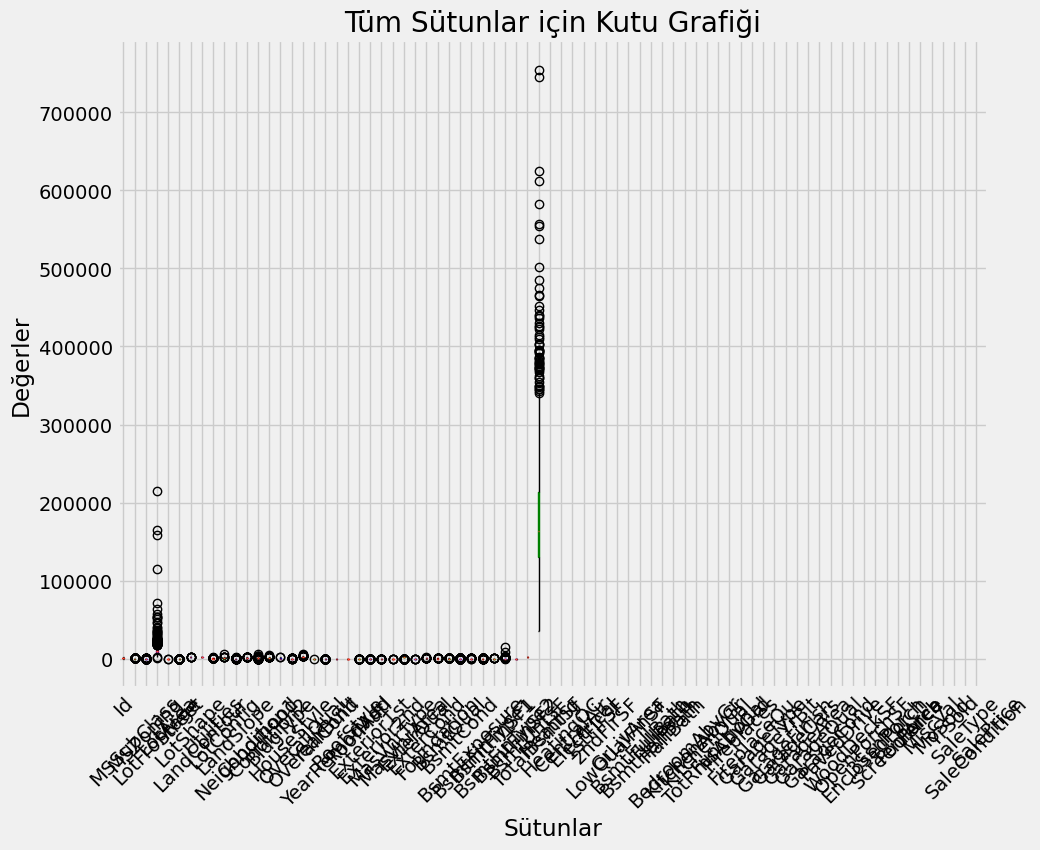

In [396]:

# Kutu grafiği için renkler belirliyoruz
colors = ['red', 'green', 'blue', 'purple']

# Tüm sütunlar için kutu grafikleri çiziyoruz
plt.figure(figsize=(10, 8))  # Grafiğin boyutunu ayarlıyoruz

for i, column in enumerate(numerical_columns):
    # Her sütun için kutu grafiği çiziyoruz
    plt.boxplot(data[column], positions=[i], boxprops=dict(color=colors[i % len(colors)]))

plt.xticks(range(len(columns)), columns, rotation=45)  # X eksenindeki etiketleri ayarlıyoruz
plt.title('Tüm Sütunlar için Kutu Grafiği')  # Grafiğe başlık ekliyoruz
plt.xlabel('Sütunlar')  # X eksenine etiket ekliyoruz
plt.ylabel('Değerler')  # Y eksenine etiket ekliyoruz
plt.grid(True)  # Izgara çizgilerini ekliyoruz
plt.show()  # Grafiği gösteriyoruz

<Figure size 1200x800 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x24043f80190>,
 'caps': [<matplotlib.lines.Line2D at 0x24043f81450>,
 'boxes': [<matplotlib.lines.Line2D at 0x24043f73850>,
 'medians': [<matplotlib.lines.Line2D at 0x24043f82410>,
 'fliers': [<matplotlib.lines.Line2D at 0x24043f82b90>,
 'means': []}

Text(0.5, 1.0, 'Boxplot of Z-Scores for Numerical Columns')

Text(0.5, 0, 'Z-Score')

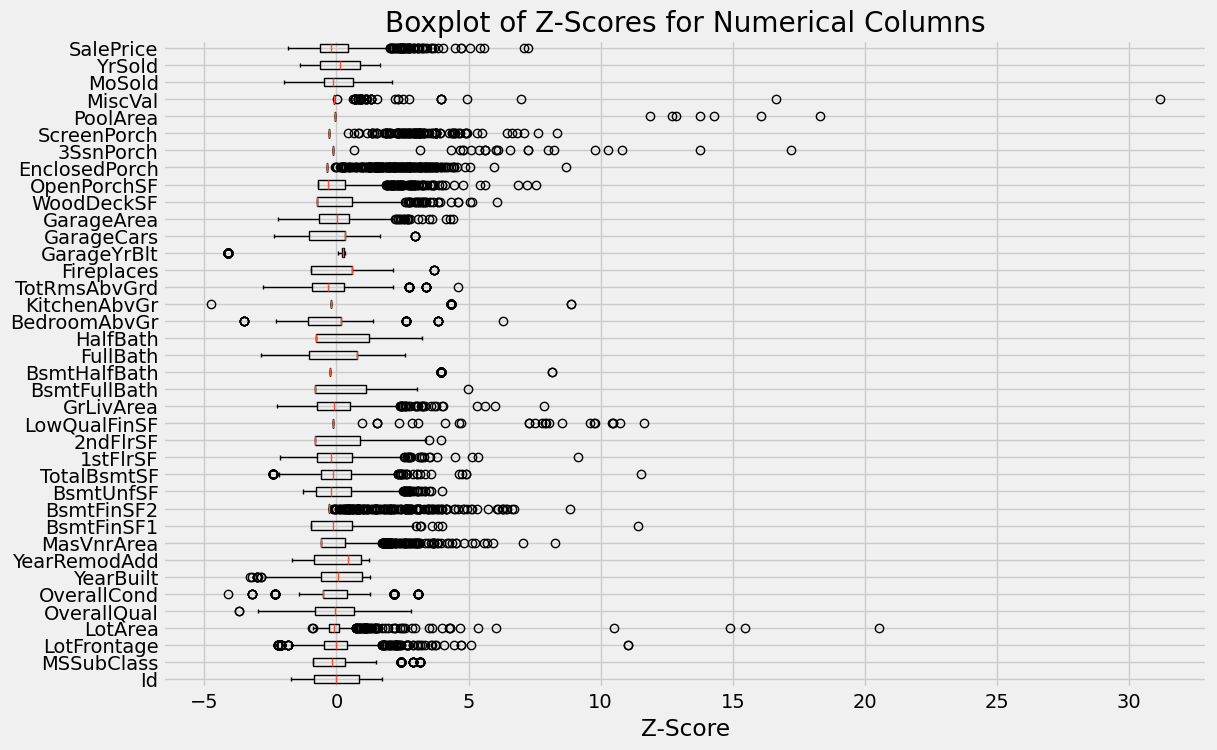

In [397]:
# outlier detection
z_scores = zscore(data[numerical_columns])

z_scores_train_data = pd.DataFrame(z_scores, columns=numerical_columns)

plt.figure(figsize=(12, 8))
plt.boxplot(z_scores_train_data.values, labels=numerical_columns, vert=False)
plt.title('Boxplot of Z-Scores for Numerical Columns')
plt.xlabel('Z-Score')
plt.show()

In [398]:


Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

data = data[(data["SalePrice"] > lower) & (data["SalePrice"] < upper)]
#outliers['SalePrice'].describe()


In [416]:
print(Q1 )
print(Q3 )
print(IQR )

129975.0
214000.0
84025.0


<Figure size 1200x800 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x240448c8550>,
 'caps': [<matplotlib.lines.Line2D at 0x240448c9950>,
 'boxes': [<matplotlib.lines.Line2D at 0x2404488a890>,
 'medians': [<matplotlib.lines.Line2D at 0x240448ca810>,
 'fliers': [<matplotlib.lines.Line2D at 0x240448cb090>,
 'means': []}

Text(0.5, 1.0, 'Boxplot of Z-Scores for Numerical Columns')

Text(0.5, 0, 'Z-Score')

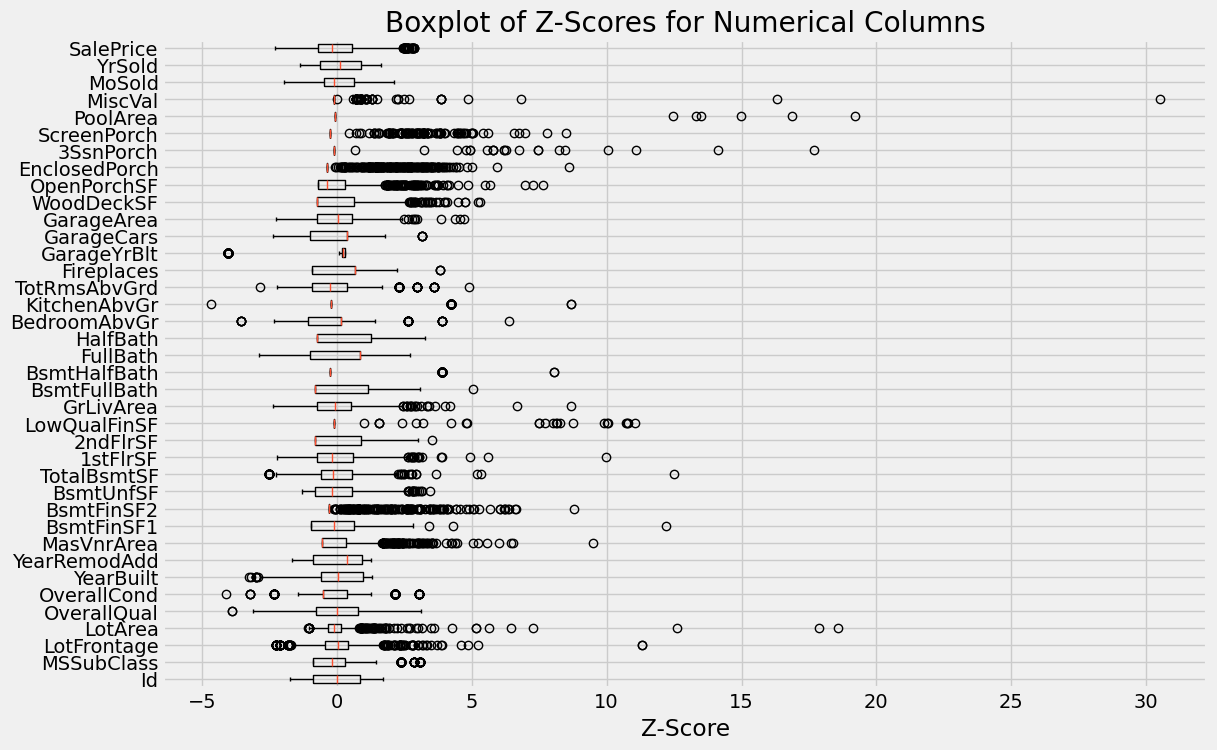

In [399]:
# outlier detection
z_scores = zscore(data[numerical_columns])

z_scores_train_data = pd.DataFrame(z_scores, columns=numerical_columns)

plt.figure(figsize=(12, 8))
plt.boxplot(z_scores_train_data.values, labels=numerical_columns, vert=False)
plt.title('Boxplot of Z-Scores for Numerical Columns')
plt.xlabel('Z-Score')
plt.show()

In [419]:
data['MiscVal'].max()

15500

In [410]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,733.508935,57.487491,69.230879,10155.280915,5.983560,5.591137,1970.080772,1984.058613,89.725518,417.333095,47.478914,559.461758,1024.273767,1132.247320,336.476054,5.690493,1474.413867,0.410293,0.058613,1.540386,0.370264,2.862044,1.048606,6.416726,0.583274,1862.969979,1.717655,458.817012,89.621158,44.892066,22.378127,3.231594,14.634024,2.482487,45.385275,6.312366,2007.819871,170237.127234
std,422.811873,42.803603,21.525884,8324.834198,1.282272,1.118236,30.009463,20.661160,159.219858,428.401771,162.648530,429.378909,407.031806,357.318243,421.440524,47.292646,480.552421,0.514797,0.240995,0.537219,0.500503,0.806081,0.224874,1.544766,0.631804,462.621638,0.721365,204.278673,121.798431,65.718951,61.454480,28.563071,54.752105,38.289681,506.746349,2.703584,1.327762,59230.130817
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,367.500000,20.000000,60.000000,7442.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,218.000000,788.000000,870.500000,0.000000,0.000000,1119.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,739.000000,50.000000,70.000000,9317.000000,6.000000,5.000000,1971.000000,1992.000000,0.000000,370.000000,0.000000,476.000000,973.000000,1069.000000,0.000000,0.000000,1437.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,471.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159500.000000
75%,1098.500000,70.000000,78.000000,11316.500000,7.000000,6.000000,1999.000000,2003.000000,143.000000,686.000000,0.000000,807.000000,1251.500000,1346.500000,720.000000,0.000000,1728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,573.000000,165.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,203500.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,1474.000000,2042.000000,6110.000000,4692.000000,1818.000000,528.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,340000.000000


In [401]:
num_miss_val_list = num_missing_values[num_missing_values > 0].sort_values(ascending = False).index.to_list()
num_miss_val_list


['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [402]:
InteractiveShell.ast_node_interactivity = "last"

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Plot')

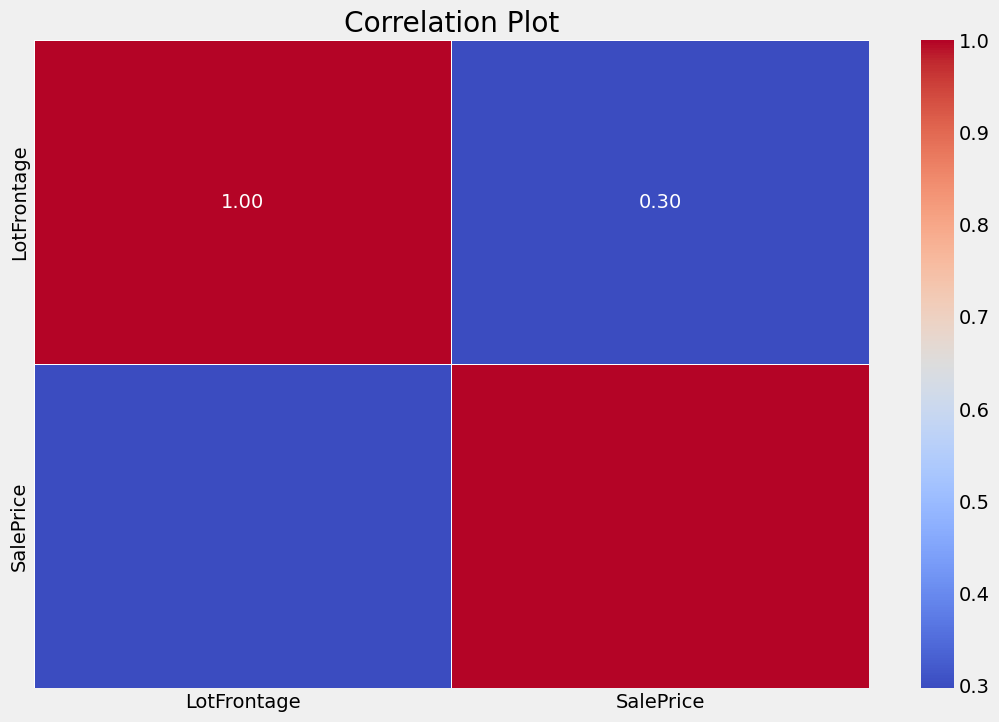

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Plot')

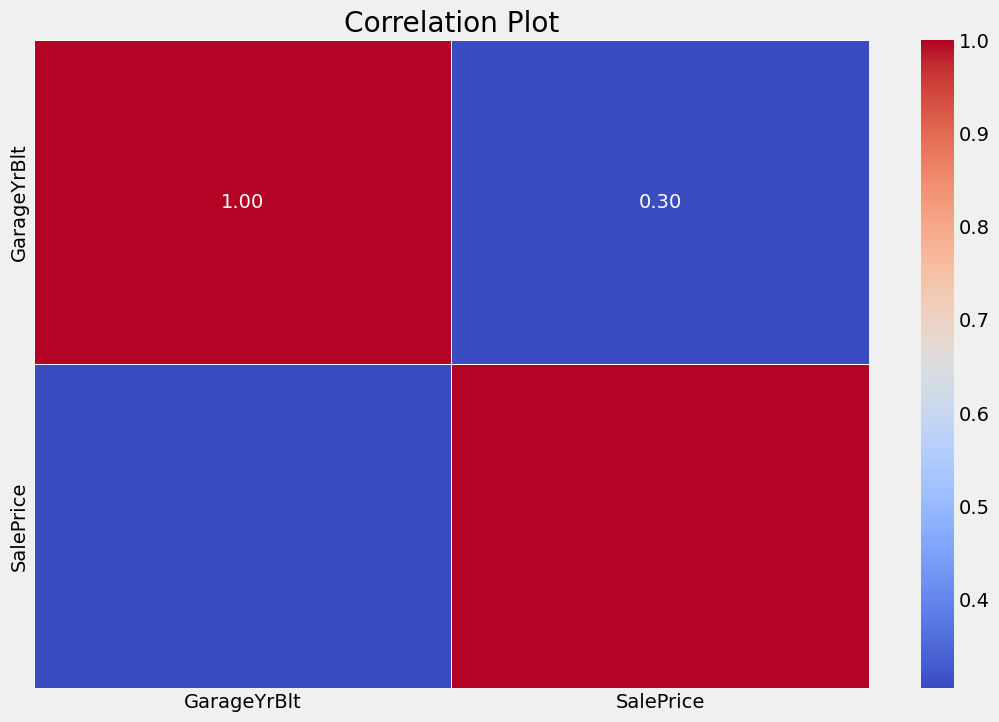

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Plot')

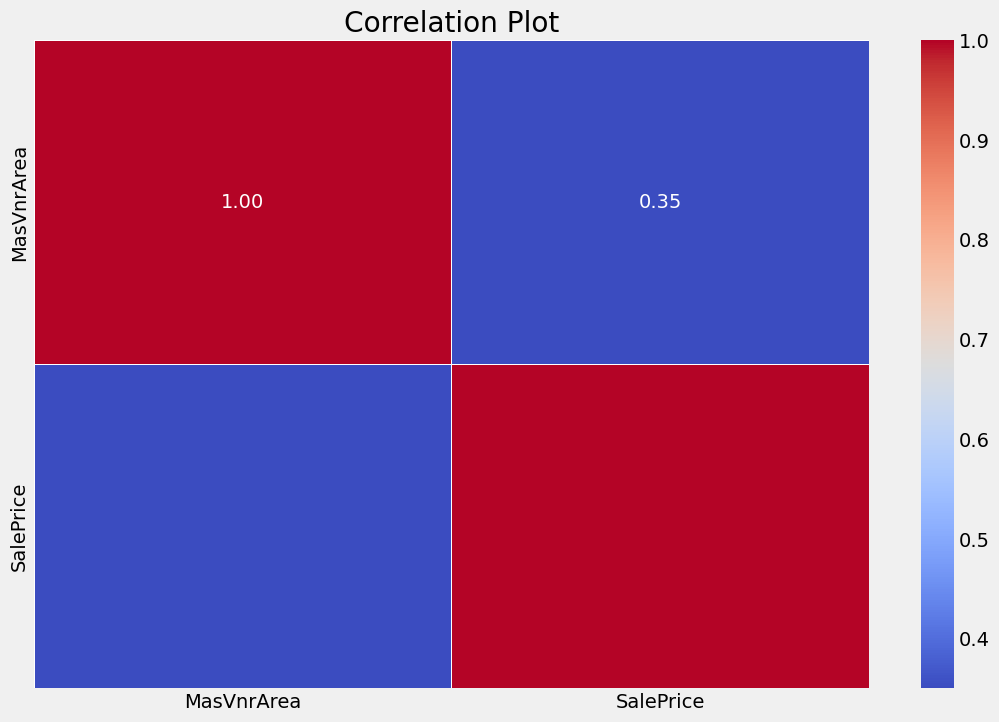

In [403]:
for column_name in num_miss_val_list:

    data_corr = data[[column_name, 'SalePrice']].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Plot')
    plt.show()

<Figure size 1200x800 with 0 Axes>

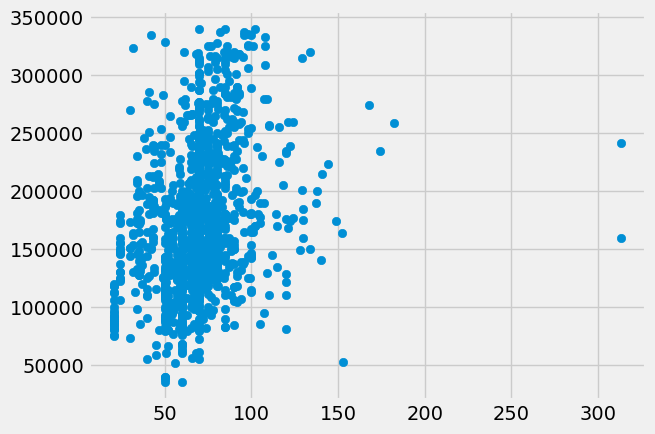

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

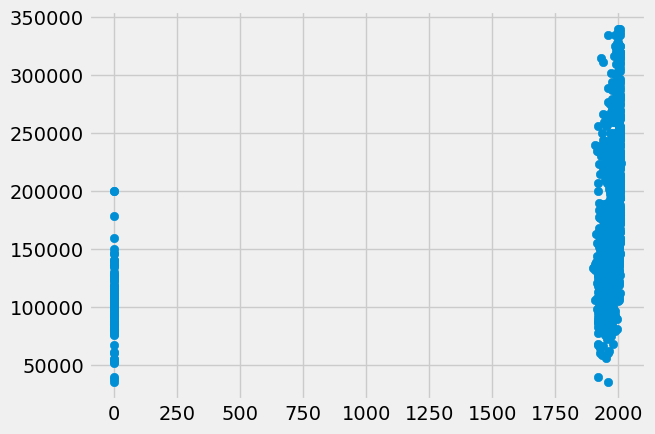

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

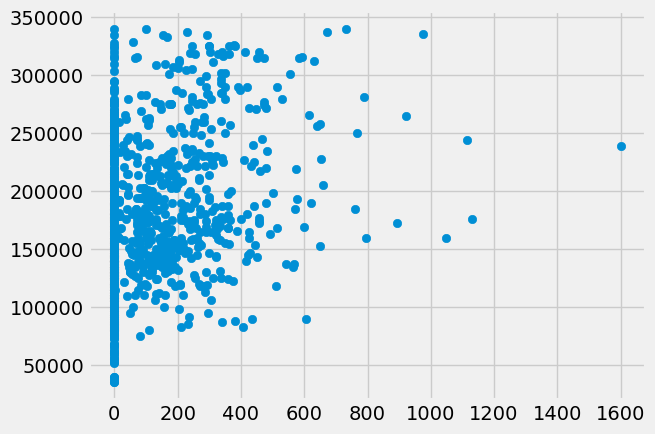

<Figure size 1200x800 with 0 Axes>

In [404]:
for column_name in num_miss_val_list:
    plt.scatter(data[column_name], data['SalePrice'])
    plt.figure(figsize=(12, 8))
    #plt.title('Correlation Plot')
    plt.show()

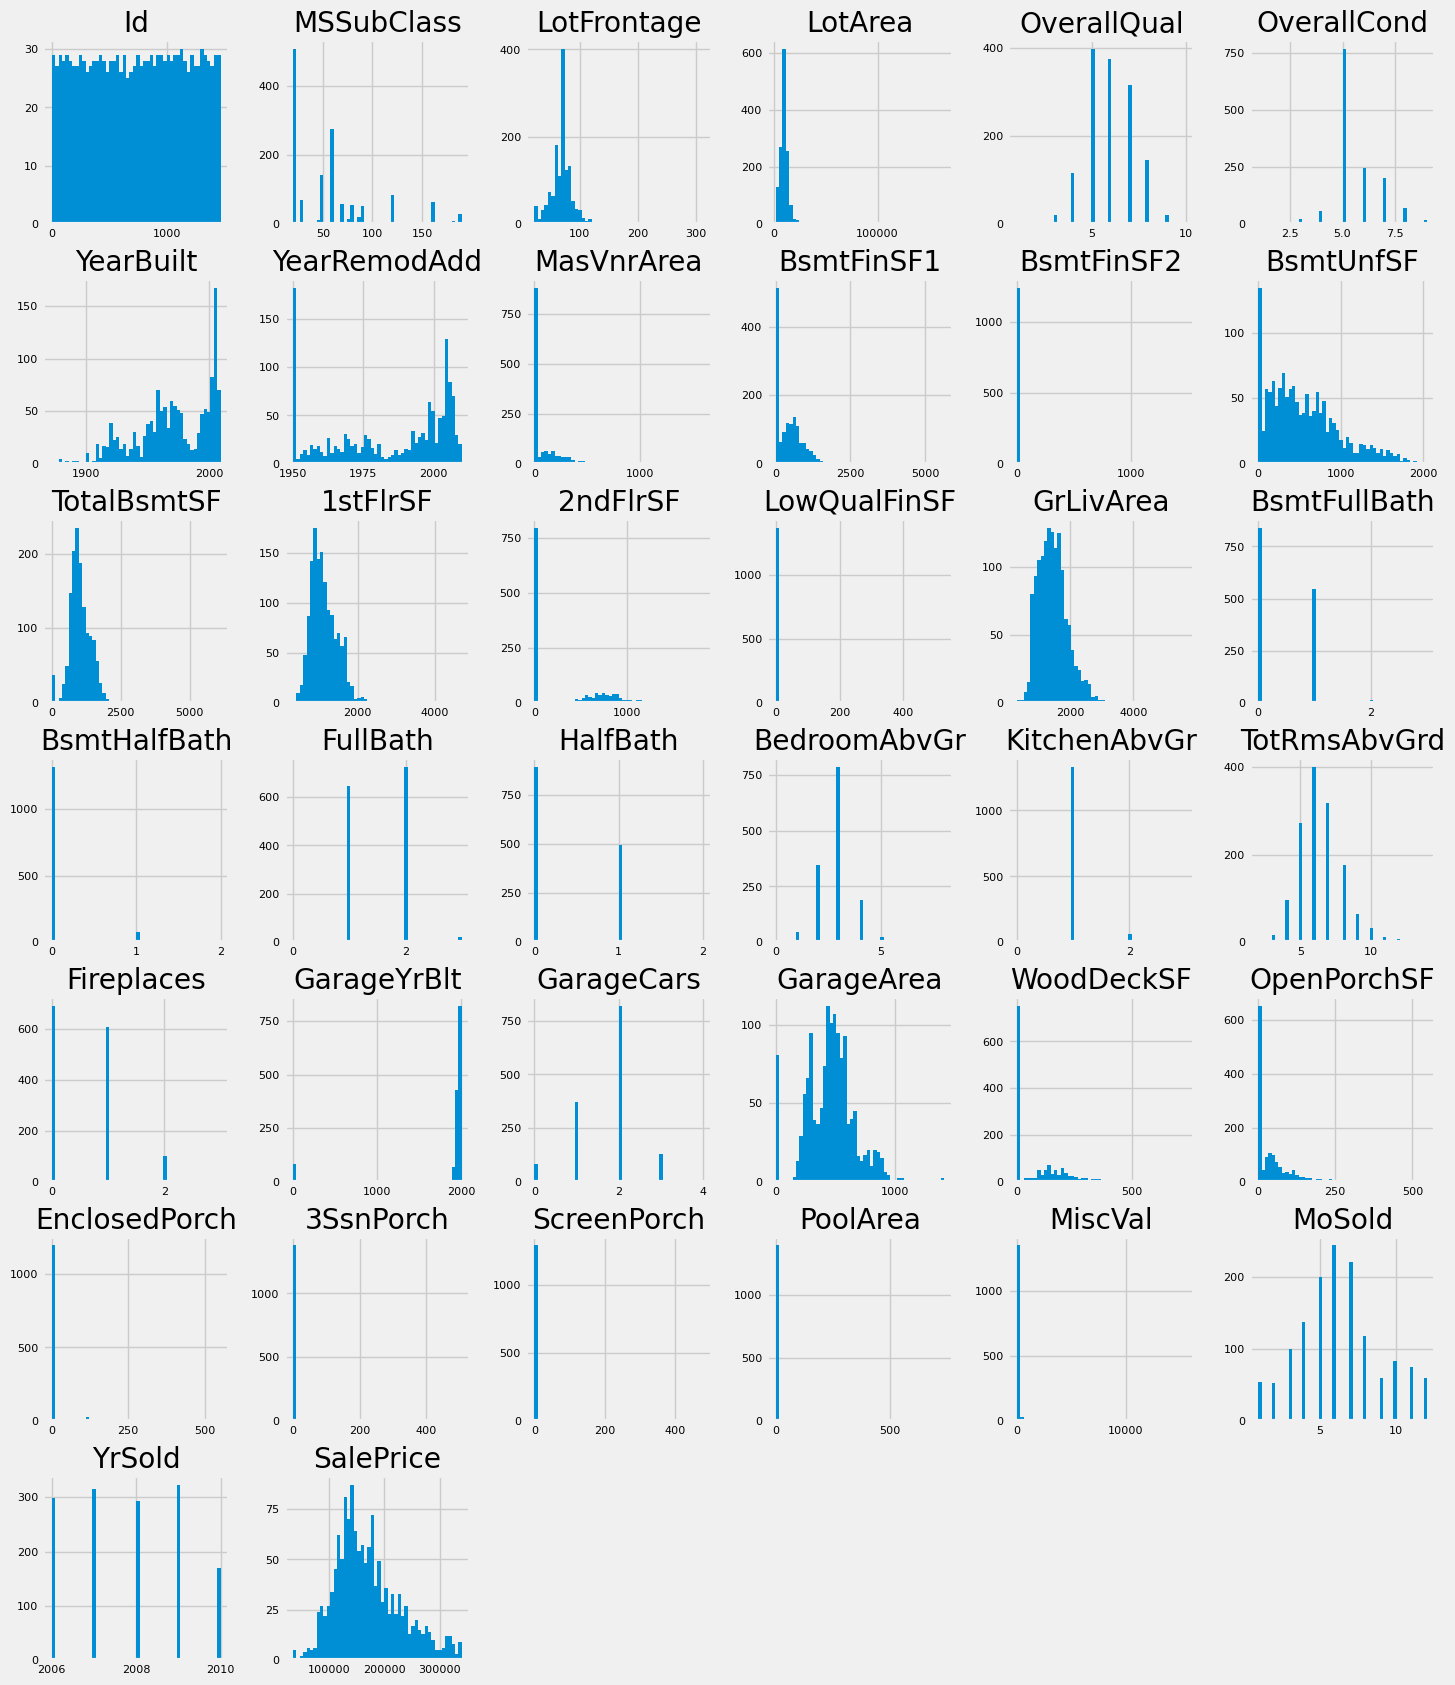

In [405]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

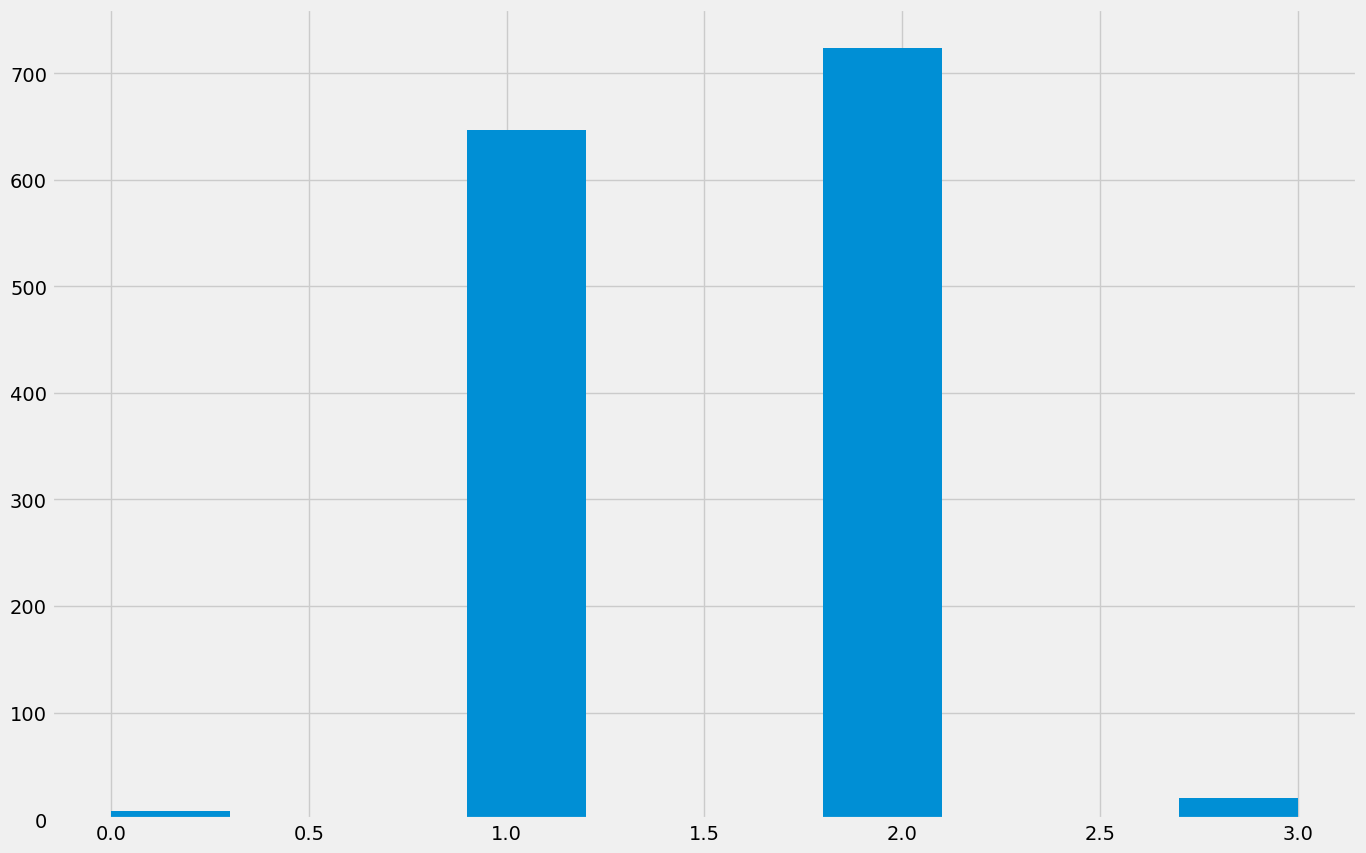

In [406]:
data['FullBath'].hist(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.5)



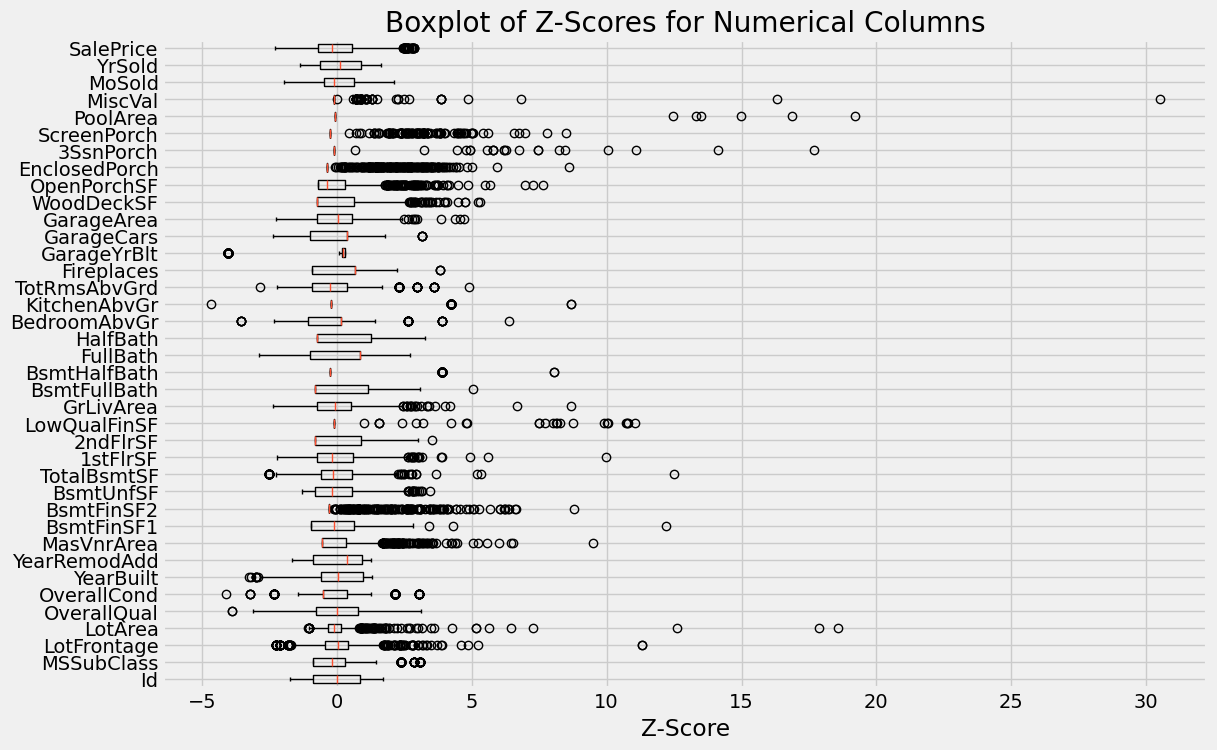

In [407]:
# outlier detection
z_scores = zscore(data[numerical_columns])

z_scores_train_data = pd.DataFrame(z_scores, columns=numerical_columns)

plt.figure(figsize=(12, 8))
plt.boxplot(z_scores_train_data.values, labels=numerical_columns, vert=False)
plt.title('Boxplot of Z-Scores for Numerical Columns')
plt.xlabel('Z-Score')
plt.show()

In [408]:
data[['MasVnrType', 'FireplaceQu', 'LotFrontage']]

,MasVnrType,FireplaceQu,LotFrontage
0,BrkFace,FireplaceQu,65.0
1,No Masonry,TA,80.0
2,BrkFace,TA,68.0
3,No Masonry,Gd,60.0
4,BrkFace,TA,84.0
...,...,...,...
1455,No Masonry,TA,62.0
1456,Stone,TA,85.0
1457,No Masonry,Gd,66.0
1458,No Masonry,FireplaceQu,68.0


MasVnrType: Masonry veneer type
FireplaceQu: Fireplace quality
LotFrontage: Linear feet of street connected to property

In [409]:
print('MasVnrType unique: ' + str(data['MasVnrType'].unique()))
print('FireplaceQu: ' + str(data['FireplaceQu'].unique()))

MasVnrType unique: ['BrkFace' 'No Masonry' 'Stone' 'BrkCmn']
FireplaceQu: ['FireplaceQu' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
